# <center> Tps sur les Generative Adversarial Networks (GANs)</center>

## 1. Description des GANS

## 1.1 Principe
Les **réseaux antagonistes génératifs** ou GANs ont été proposés en 2014 par Ian Goodfellow et al. Même si l’idée a instantanément intéressé les cher­cheurs, il aura fallu quelques années pour surmonter certaines des difficultés de l’en­traînement des GAN. L'idée sous-jacente semble simple après coup : **faire en sorte que deux réseaux de neurones soient mis en concurrence l'un contre l'autre en espérant que ce duel les pousse à exceller**. Comme le montre la figure ci-dessous, un GAN est constitué de deux réseaux de neurones :
- Un **générateur** 
 -- qui prend **en entrée une distribution aléatoire** (typiquement gaussienne) 
 -- et produit **en sortie des données** – ici une image. Vous pouvez considérer les entrées aléatoires comme les **représentations latentes**(c’est-à-dire des codages) des données (ici l’image qui doit être générée. 
- Un **discriminateur** prend en entrée 
 -- soit une image factice (label 0) provenant du générateur, 
 -- soit une image réelle (label 1) provenant du jeu d’entraînement
 -- et doit deviner si cette image d’entrée est fausse (label 0) ou réelle (label 1).

<table align="center">
<td align="center">
<img src="https://drive.google.com/uc?id=1UdhFyWqxfu3MDhxZoWJNQ1Wh-H4FKweZ" style="padding-bottom:5px;" height="300px" />
<td/>
</table>

## 1.2 Entrainement
Pendant l’entraînement, le générateur et le discriminateur ont des objec­tifs opposés. Le discriminateur tente de distinguer les images factices des images réelles, tandis que le générateur tente de produire des images suffisamment réelles pour tromper le discriminateur. Puisque le GAN est constitué de deux réseaux aux objectifs différents, il ne peut pas être entraîné à la manière d’un réseau de neurones normal. Chaque itération d’entraînement comprend deux phases :
- Au cours de la **première phase**, nous entraînons le **discriminateur**. 
 - Un lot d’images réelles est échantillonné (choisi) à partir du jeu entraînement dont les labels sont fixés à 1, 
 - A ce lot est ajouté un nombre égal d’images factices produites par le générateur dont les labels sont fixés à 0.
 - Le discriminateur est entraîné sur ce dataset labéllisé pendant une étape, en utilisant une fonction de coût d'entropie croisée binaire (*binary cross entropy*). 
 - Il est important de noter que, au cours de cette étape, la rétropropagation optimise uniquement les poids du discriminateur.

- Au cours de la **seconde phase**, nous entraînons le **générateur**. 
 - Nous l’utilisons tout d’abord pour produire un autre lot d’images factices 
 - et, une fois encore, le discriminateur doit dire si les images sont fausses ou réelles. 
 - Cette fois-ci, nous n’ajoutons aucune image réelle au lot et toutes les étiquettes sont fixées à 1 (réelles). Autrement dit, nous voulons que le générateur produise des images que le discriminateur considérera (à tort) réelles. 
 - Il est indispensable que les poids du discriminateur soient figés au cours de cette étape, de sorte que la rétropropagation affecte uniquement les poids du générateur.

## 1.3 Principe

Dans ce TPs, il vous est demandé de construire différents GANs pour le dataset [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist):

"Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits."


## 2. Préambule

 ## 2.1 Montage du drive

In [32]:
# GOOGLE COLAB
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
  # mount google drive directories
  from google.colab import drive
  drive.mount('/content/gdrive', force_remount=True)  

  # execute, log on google drive and click the folder image on the left and 
  # replace the code_folder path (below) to the folder path of this ipynb file

# ----------- Your code here --------------------->

#  code_folder = '/content/gdrive/My Drive...' # remplacer par le chemin vers ce notebook à partir de My Drive/...

# ------------------------------------------------>
  
  # change to the right folder
  %cd "$code_folder"
  !ls 


## 2.2 Imports utiles

In [33]:

# Common imports
import numpy as np
import os


# TensorFlow
import tensorflow as tf

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected.")
    



# Import to display
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# gestion des graines aléatoires
np.random.seed(33)
tf.random.set_seed(33)


No GPU was detected.


## 2.3 Fonctions utiles

In [34]:
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")


## 3. Import des données Fashion MNIST

Les lignes suivantes permet l'import des images et labels d'apprentissage et de test. Pensez à examiner le type et le codage de chacune des variables.

In [35]:
# import des données 
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

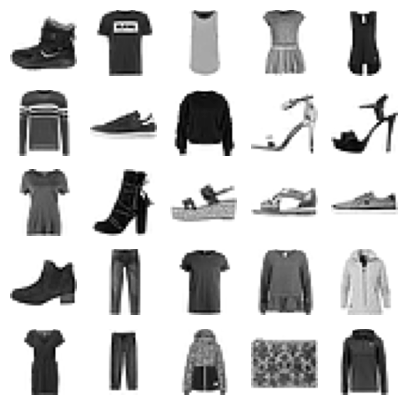

In [36]:
plot_multiple_images(np.array(X_train[0:25]), n_cols=5)

**Question 3.1: Donnez les renseignements sur la base d'images** 
- Combien y'a-t-il de données d'entrainement et de test?
- Quelles sont les dimension des images ? comment sont elles codées? Quelle est l'échelle des valeurs prises?
- Comment sont codés les labels? A quoi correspondent-ils?

**_`Your commented code below`_**

In [37]:
# ----------- Your code here --------------------->

# Taille de l'ensemble d'entraînement
num_train_examples = X_train.shape[0]
print("Nombre d'exemples dans l'ensemble d'entraînement :", num_train_examples)

# Taille de l'ensemble de test
num_test_examples = X_test.shape[0]
print("Nombre d'exemples dans l'ensemble de test :", num_test_examples)

# Dimensions des images d'entraînement
image_shape_train = X_train.shape[1:]
print("Dimensions des images d'entraînement :", image_shape_train)

# Dimensions des images de test
image_shape_test = X_test.shape[1:]
print("Dimensions des images de test :", image_shape_test)

# Imprimer l'échelle des valeurs
print("Échelle des valeurs dans les images - Min :", X_train.min())
print("Échelle des valeurs dans les images - Max :", X_train.max())

# Imprimer le type des labels
print("Type des labels :", y_train.dtype)

# ------------------------------------------------>


Nombre d'exemples dans l'ensemble d'entraînement : 60000
Nombre d'exemples dans l'ensemble de test : 10000
Dimensions des images d'entraînement : (28, 28)
Dimensions des images de test : (28, 28)
Échelle des valeurs dans les images - Min : 0
Échelle des valeurs dans les images - Max : 255
Type des labels : uint8


Le jeu de données Fashion MNIST contient des images en niveaux de gris de 28x28 pixels. Les images sont représentées sous forme de tableaux numpy, où chaque élément du tableau représente la valeur du pixel à cette position de l'image.

En ce qui concerne l'échelle des valeurs prises par les pixels, les valeurs sont généralement codées en niveaux de gris entre 0 et 255. Cela signifie que chaque valeur de pixel est un entier compris entre 0 (noir) et 255 (blanc), où des valeurs plus élevées indiquent des niveaux de gris plus clairs

Les labels dans le jeu de données Fashion MNIST sont codés en tant qu'entiers, où chaque entier représente une classe spécifique. Chaque classe correspond à un type particulier de vêtement ou d'accessoire de mode.

Voici l'ensemble des labels :

0 : T-shirt/top
1 : Trouser
2 : Pullover
3 : Dress
4 : Coat
5 : Sandal
6 : Shirt
7 : Sneaker
8 : Bag
9 : Ankle boot

## 4. Prétraitements des données

**Question 4.1: dans cette étape, il vous est demandé de:**
- Selectionner les `nb_train_image` premieres images et les labels associés
- Normaliser les données entre 0 et 1 (penser à transformer les données en float 32)
- et de les mettre en forme d'un vecteur

In [38]:
nb_train_image = 1000

# Sélectionner les nb_train_image premières données
X_train = X_train[:nb_train_image]
y_train = y_train[:nb_train_image]

# Prétraitement des données (normalisation entre 0 et 1)
X_train = X_train.astype('float32') / 255.0

# Mise en forme des images en vecteurs (X_train_flat est de dimension nbImages x nbPixels)
X_train_flat = X_train.reshape((X_train.shape[0], -1))

print('La taille initiale est: {}'.format(X_train.shape))
print('La taille finale est: {}'.format(X_train_flat.shape))

La taille initiale est: (1000, 28, 28)
La taille finale est: (1000, 784)


**Question 4.2: créer un objet td.data.Dataset mélangé avec une mise en batch de taille BATCH_SIZE (16 dans un premier temps).**

Attention penser à supprimer le dernier batch de taille inférieure à BATCH_SIZE.

In [39]:
BATCH_SIZE = 16

# Créer un objet tf.data.Dataset à partir des données d'entraînement
dataset = tf.data.Dataset.from_tensor_slices(X_train)

# Mélanger le dataset
dataset = dataset.shuffle(buffer_size=len(X_train))

# Diviser le dataset en batchs de taille BATCH_SIZE
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

# Afficher quelques informations sur le dataset
print("Nombre total de batches:", len(list(dataset)))


Nombre total de batches: 62


## 5. Création du Generative Adversarial Network
Nous devons tout d’abord construire les architectures du générateur et le discriminateur.



### 5.1 -  Création du générateur

**Question: créer un générateur possédant:**
- une premiere couche 
 - dense ou **fully connected** 
 - de **100 neurones** 
  - avec une **activation** de type **selu** 
  - et une taille d'entrée **CODINGS_SIZE=30**
- une seconde couche dense ou *fully connected* de 150 neurones avec une activation de type selu
- une troisième couche dense ou *fully connected* de 784 neurones avec une activation de type sigmoid
- la dernière couche fera l'opération inverse du *flatten*. A partir des 784 neurones de la couche précédente, elle recréra un structure spaciale 28x28. Pour cela, il faut utiliser `tf.keras.layers.Reshape`.


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape

CODINGS_SIZE = 30

# Créer le générateur
generator = Sequential([
    Dense(100, activation='selu', input_shape=(CODINGS_SIZE,)),
    Dense(150, activation='selu'),
    Dense(784, activation='sigmoid'),
    Reshape((28, 28))
])

# Afficher un résumé du générateur
generator.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               3100      
                                                                 
 dense_7 (Dense)             (None, 150)               15150     
                                                                 
 dense_8 (Dense)             (None, 784)               118384    
                                                                 
 reshape_1 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 136634 (533.73 KB)
Trainable params: 136634 (533.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 5.2 - Création du discriminateur

**Question: créer un discriminateur possédant:**
- une première couche fera l'opération de *flatten*. A partir d'une entrée de  28x28 neurones, elle rendra 784 valeurs. 
- une seconde couche dense ou *fully connected* de 150 neurones avec une activation de type selu 
- une troisième couche dense ou *fully connected* de 100 neurones avec une activation de type selu
- une dernière couche dense ou *fully connected* de type classifieur binaire



In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Créer le discriminateur
discriminator = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(150, activation='selu'),
    Dense(100, activation='selu'),
    Dense(1, activation='sigmoid')
])

# Afficher un résumé du discriminateur
discriminator.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 150)               117750    
                                                                 
 dense_10 (Dense)            (None, 100)               15100     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 132951 (519.34 KB)
Trainable params: 132951 (519.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 5.3. Création du GAN complet

In [42]:
gan = tf.keras.models.Sequential([generator, discriminator])

### 5.4. compilation des modèles
Nous devons à présent compiler ces modèles en respectant la séquence d'entrainement évoqué précedemment; il faut donc choisir la tâche à réaliser (la loss function) et comment on fait la descente de gradient 'l'optimiseur).

Puisque le discriminateur est un classifieur binaire, nous pouvons naturellement utiliser la perte d’entropie croisée binaire.

Le générateur n’étant entraîné qu’au travers du modèle gan, il est donc inutile de le compiler. Le modèle gan est également un classificateur binaire et peut donc utiliser la perte d’entropie croisée binaire. Le discriminateur ne devant pas être entraîné au cours de la seconde phase, nous le rendons non entraînable avant de compiler le modèle gan.

Note: Keras tient compte de l’attribut trainable uniquement au moment de la compilation d’un modèle. Attention donc à l'ordre des commandes pour le rendre entrainable. Le Discriminateur doit entrainable mais pas pour le GAN... 

**Question 5.1: Compiler le modèle pour le discriminateur**

In [43]:
# fonction de cout (tache à réaliser)
# ----------- Your code here --------------------->

loss_fcn = 'binary_crossentropy'

# ----------- Your code here --------------------->
# ------------------------------------------------>

# Choix de l'optimiseur
opt_fcn = "rmsprop"

# Compilation du discriminateur
# ----------- Your code here --------------------->

discriminator.compile(optimizer=opt_fcn, loss=loss_fcn, metrics=['accuracy'])
# ------------------------------------------------>





**Question 5.2: Compiler le modèle pour le gan après avoir rendu le discriminateur non entrainable**

In [44]:
# fonction de cout (tache à réaliser)

# ----------- Your code here --------------------->
loss_fcn_gan = 'binary_crossentropy'

# ------------------------------------------------>


# Choix de l'optimiseur

# rendre le discriminateur non entrainable
# ----------- Your code here --------------------->
discriminator.trainable = False

# ------------------------------------------------>

# Compilation du GAN

# ----------- Your code here --------------------->

gan.compile(optimizer=opt_fcn, loss=loss_fcn_gan)

# ------------------------------------------------>


## 6. Entrainement du GAN

Puisque la boucle d’entraînement est inhabituelle, nous ne pouvons pas utiliser la méthode *fit()* normale. À la place, nous écrivons une **boucle d’entraînement personnalisée**. 

Vous pouvez constater les deux phases de chaque itération :
- Dans la **phase 1**, 
 - nous fournissons au générateur un bruit gaussien afin qu’il produise des images factices 
 - nous complétons ce batch d’images par autant d’images réelles. Les cibles sont fixées à 0 pour les fausses images et à 1 pour les images réelles. 
 - Ensuite, nous entraînons le discriminateur sur ce batch.

- Dans la **phase 2**, 
 - nous fournissons au GAN du bruit gaussien. 
  - Son générateur commence à produire des images factices, puis le discriminateur tente de deviner si des images sont fausses ou réelles. 
  - Puisque nous voulons que le discriminateur pense que les images fausses sont réelles, nous fixons les cibles à 1. 

**Question 6.1: Complétez le code suivant** 

**_`Your commented code below`_**

In [45]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=50):

    # separation des deux machines generateur et discriminateur
    generator, discriminator = gan.layers

    # boucle sur les epochs
    for epoch in range(n_epochs):
        print("Epoch {}/{}".format(epoch + 1, n_epochs))

        # boucle sur les batchs
        for X_batch in dataset:

            # ---------------------------------------->
            # phase 1: apprentissage du discriminateur

            # generation d'un bruit de distribution normale (tf.random.normal) de taille [batch_size, codings_size]

            # ----------- Your code here --------------------->

            noise = tf.random.normal(shape=[batch_size, codings_size])

            # ------------------------------------------------>




            # generer l'image à partir du générateur

            # ----------- Your code here --------------------->

            generated_images = generator(noise)

            # ------------------------------------------------>


            # creation du dataset équilibré fake/real
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            y_fake_and_real = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)

            # entrainement du discriminateur sur un batch
            discriminator.trainable = True # Cela permet simplement d’éviter que Keras n’affiche un avertissement
            discriminator.train_on_batch(X_fake_and_real, y_fake_and_real)





            # ---------------------------------------->
            # phase 2: apprentissage du generateur

            # generation d'un bruit de distribution normale de taille [BATCH_SIZE, CODINGS_SIZE]

            # ----------- Your code here --------------------->

            noise = tf.random.normal(shape=[batch_size, codings_size])

            # ------------------------------------------------>

            # creation d'un cible factice pour berner le discriminateur
            y_fake_but_set_to_real = tf.constant([[1.]] * batch_size)

            # entrainement du generateur sur un batch de bruit
            discriminator.trainable = False # Cela permet simplement d’éviter que Keras n’affiche un avertissement
            gan.train_on_batch(noise, y_fake_but_set_to_real)

        # affichage du dernier batch généré pour controle
        plot_multiple_images(generated_images, 4)
        plt.show()

Lancer l'apprentissage sur une époque

Epoch 1/1


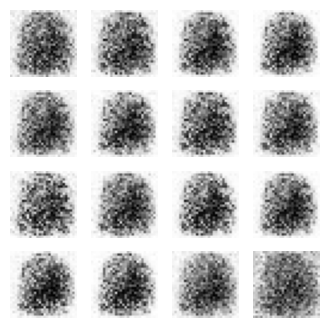

In [46]:
train_gan(gan, dataset, BATCH_SIZE, CODINGS_SIZE, n_epochs=1)

**Question 6.2: ecrire un script permettant de générer et d'afficher des images à partir du générateur entrainé et afficher**

In [47]:
# ----------- Your code here --------------------->

# noise = ...

# ------------------------------------------------>


Lancer l'entrainement pour 50 epochs (attention c'est long si vous utilisez un dataset avec les 60000 images)

Epoch 1/50


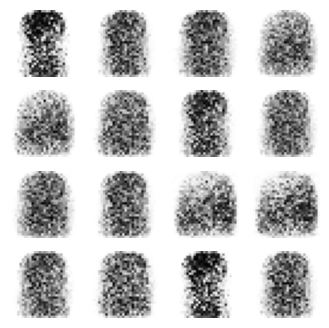

Epoch 2/50


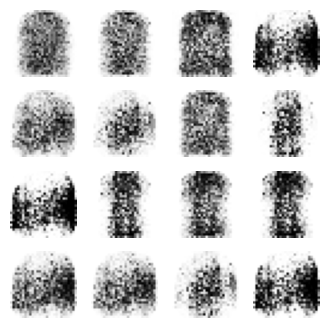

Epoch 3/50


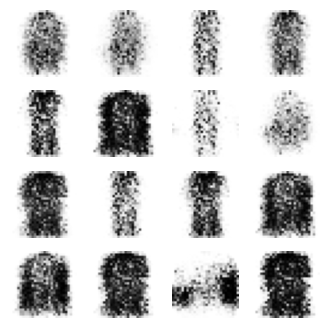

Epoch 4/50


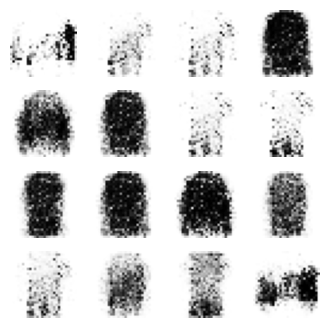

Epoch 5/50


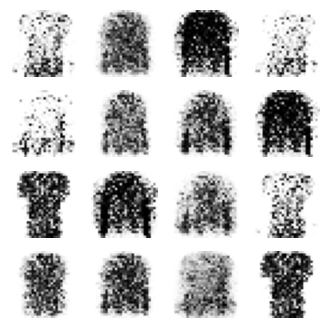

Epoch 6/50


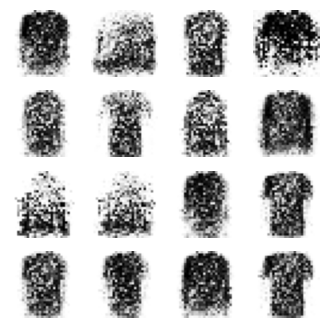

Epoch 7/50


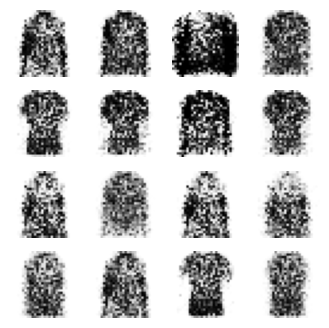

Epoch 8/50


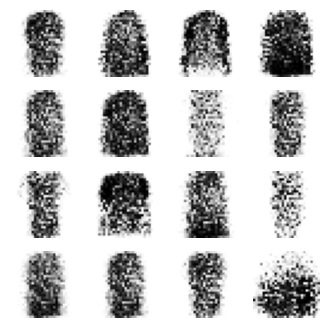

Epoch 9/50


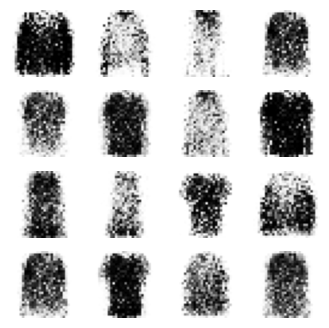

Epoch 10/50


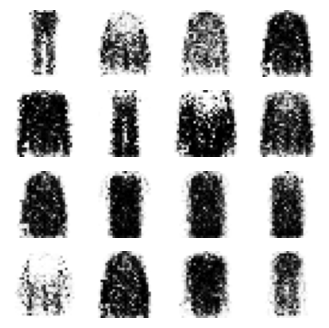

Epoch 11/50


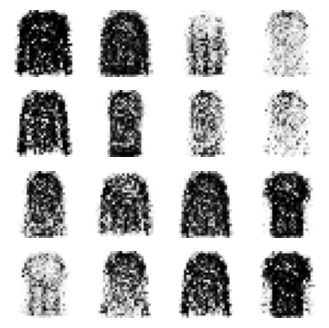

Epoch 12/50


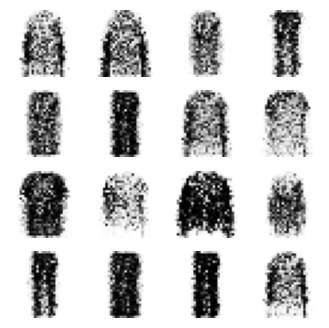

Epoch 13/50


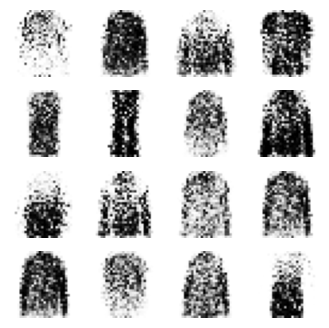

Epoch 14/50


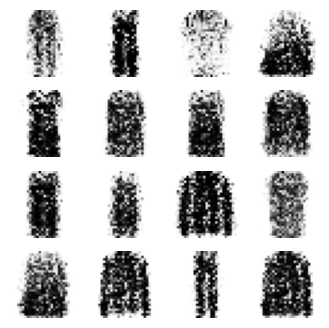

Epoch 15/50


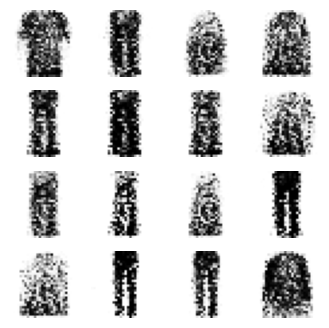

Epoch 16/50


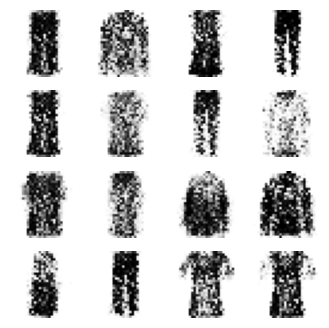

Epoch 17/50


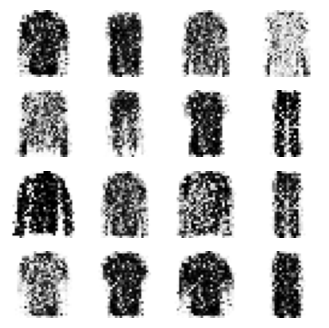

Epoch 18/50


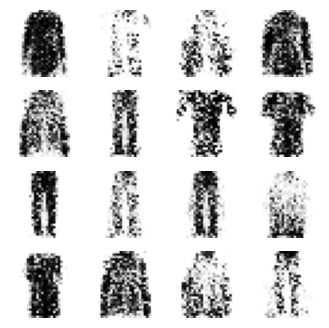

Epoch 19/50


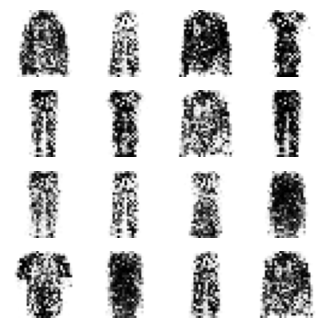

Epoch 20/50


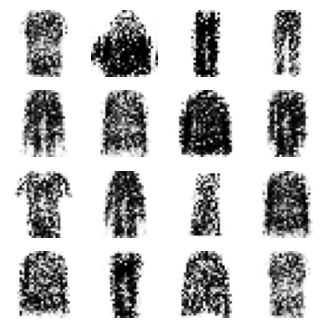

Epoch 21/50


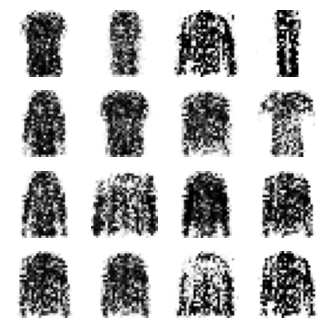

Epoch 22/50


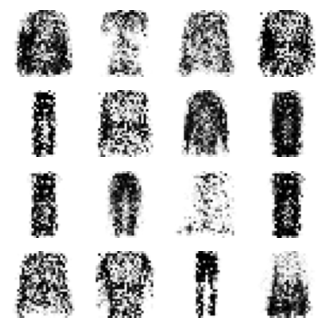

Epoch 23/50


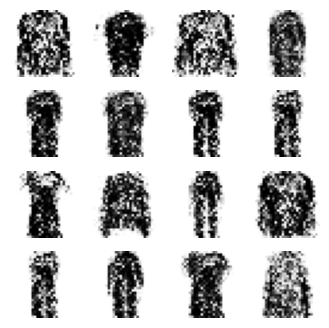

Epoch 24/50


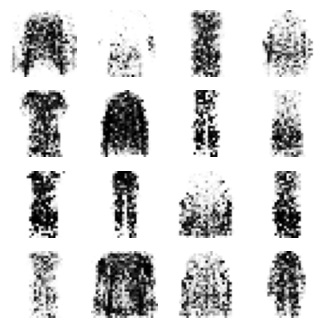

Epoch 25/50


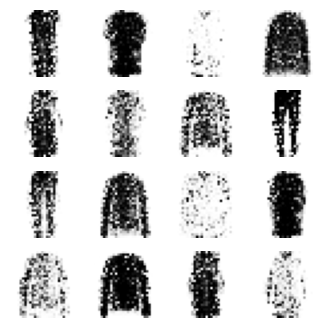

Epoch 26/50


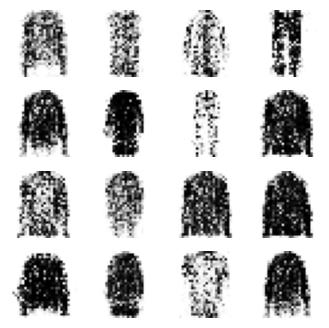

Epoch 27/50


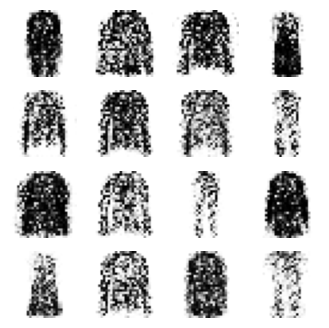

Epoch 28/50


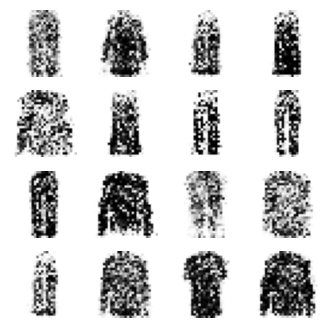

Epoch 29/50


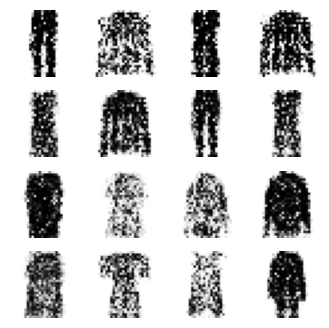

Epoch 30/50


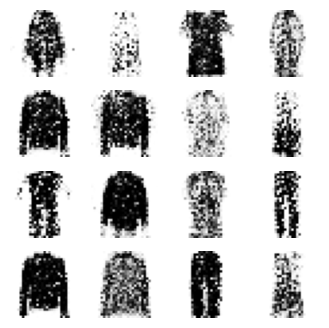

Epoch 31/50


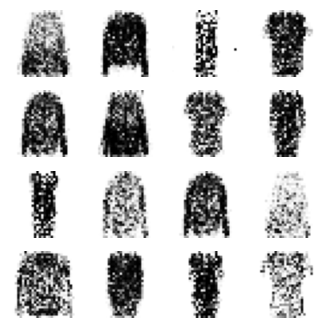

Epoch 32/50


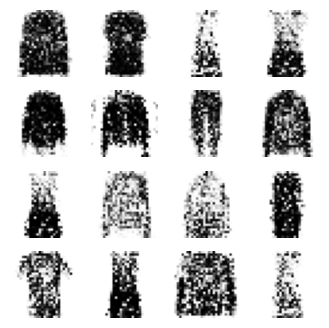

Epoch 33/50


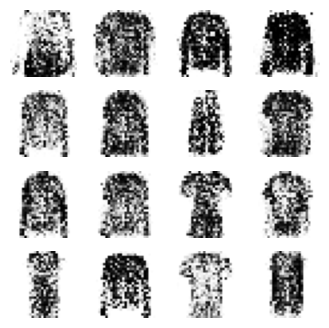

Epoch 34/50


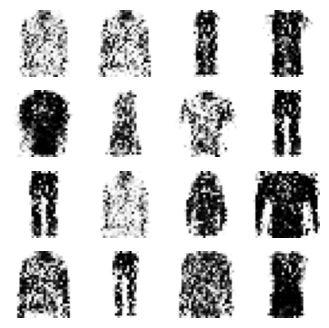

Epoch 35/50


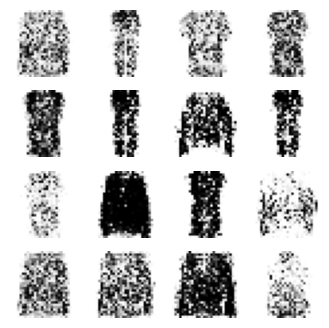

Epoch 36/50


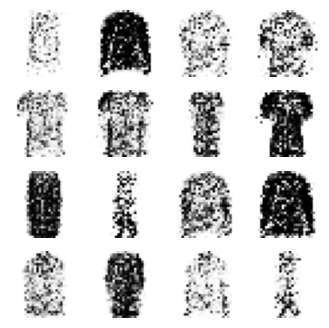

Epoch 37/50


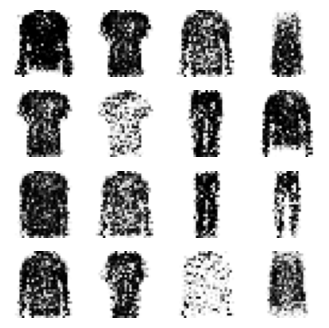

Epoch 38/50


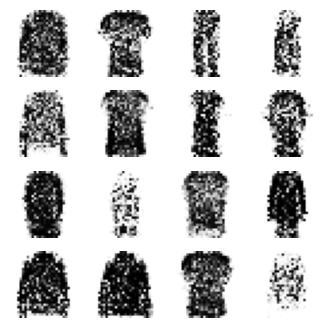

Epoch 39/50


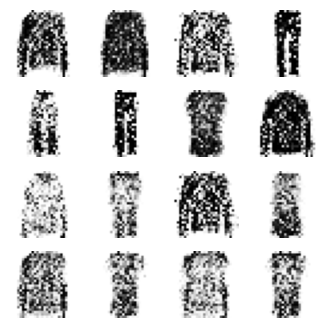

Epoch 40/50


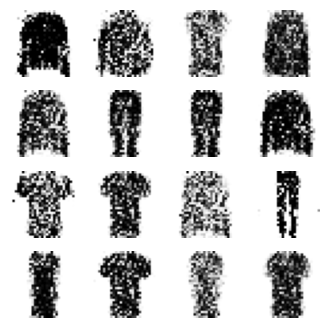

Epoch 41/50


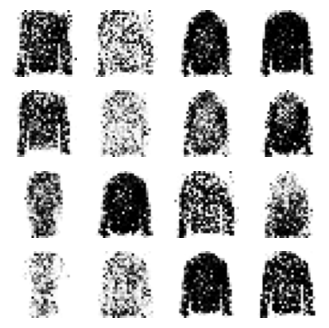

Epoch 42/50


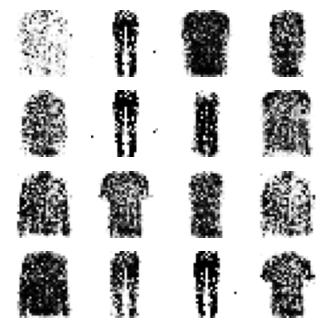

Epoch 43/50


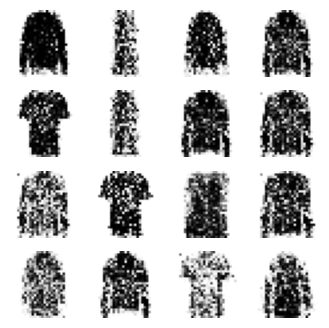

Epoch 44/50


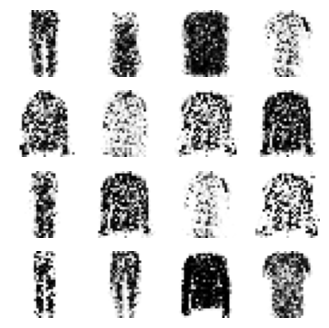

Epoch 45/50


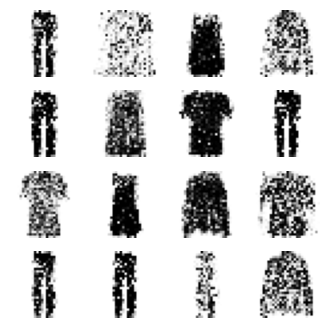

Epoch 46/50


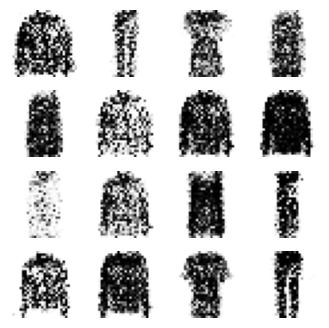

Epoch 47/50


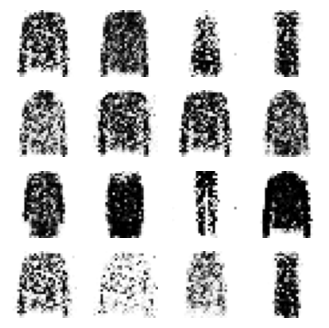

Epoch 48/50


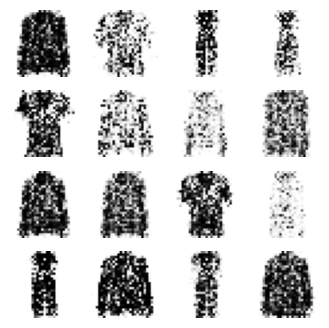

Epoch 49/50


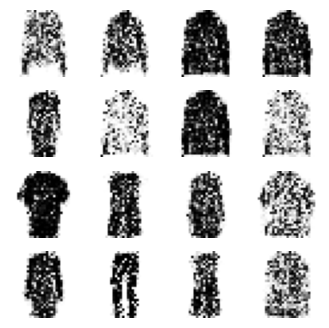

Epoch 50/50


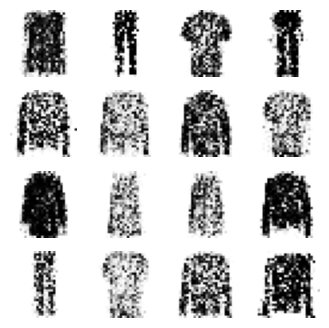

In [48]:
train_gan(gan, dataset, BATCH_SIZE, CODINGS_SIZE, n_epochs=50)

Vous verrez qu’au bout de la première époque, elles commencent déjà à ressembler à des images Fashion MNIST (mais avec beaucoup de bruit). Malheureusement, les images ne vont jamais réellement s’améliorer et vous
pourrez même trouver des épochs où le GAN semble oublier ce qu’il a appris. La raison est que l’entraînement d’un GAN peut se révéler très difficile. Nous allons regarder un autre architecture à partir de CNN.

# 7. Deep Convolutional GAN (DCGAN)

Dans l’article original de 2014, les GAN se fondaient sur des couches de convolu­tion mais ne tentaient de générer que de petites images. Peu après, de nombreux chercheurs ont essayé de construire des GAN fondés sur des réseaux convolutifs plus profonds afin de produire des images de plus grande taille. 

Cela s’est révélé délicat car l’entraînement était très instable. Cependant, fin 2015, Radford et al. ont fini par réussir, après avoir mené de nombreuses expériences avec diverses architec­tures et différents hyperparamètres. Ils ont nommé leur architecture GAN convolutif profond (DCGAN, Deep Convolutional GAN). Voici leurs principales propositions pour mettre en place des GAN convolutifs stables :
- Remplacer les couches de pooling par des convolutions à pas > 1 (stride > 1) (dans le discriminateur) et par des convolutions transposées (dans le générateur).
- Utiliser une batch-normalisation  dans le générateur et dans le discriminateur, excepté dans la couche de sortie du générateur et dans la couche d’entrée du discriminateur.
- Retirer les couches fully connected pour les architectures plus profondes.
- Dans le générateur, choisir l’activation ReLU pour toutes les couches excepté la couche de sortie, qui doit opter pour la fonction tanh.
- Dans le discriminateur, choisir l’activation Leaky ReLU pour toutes les couches.

Ces recommandations se révéleront pertinentes dans de nombreux cas, mais pas tous.

### 7.1 Générateur

**Question 7.1: créer un générateur possédant:**
- une premiere couche dense ou *fully connected* de 7*7*128=6272 neurones avec une activation de type selu et une taille d'entrée *CODINGS_SIZE=100*
- une seconde couche *tf.keras.layers.Reshape* permettant de restructurer la sortie de la couche précédente en entrée de la couche suivante en 7x7x128
- une troisième couche de BatchNormalization
- une quatrième couche de convolution transposée (*Conv2DTranspose*) avec 64 filtres de taille 5x5, un stride (déplacement) de 2, padding="same" et une activation de type *selu*
- une cinquième couche de BatchNormalization
- la dernière et sixième couche de convolution transposée (*Conv2DTranspose*) avec 1 filtre de taille 5x5, un stride (déplacement) de 2, padding="same" et une activation de type *tanh*


In [49]:
CODINGS_SIZE = 100

# ----------- Your code here --------------------->

# generator = ...

# ------------------------------------------------>


Le générateur prend des codages (variables latentes) de taille 100, les projette en 6272 dimensions (= 7 × 7 × 128), et reforme le résultat pour obtenir un tenseur 7×7×128. Celui-ci subit une normalisation par batchs, puis est transmis à une couche de convolution transposée avec un pas de 2. Elle le suréchantillonne de 7×7 à 14×14 et réduit sa profondeur de 128 à 64. Le résultat subit de nouveau une normalisation par batchs, puis est transmis à une autre couche de convolution transposée avec un pas de 2. Elle le suréchantillonne de 14×14 à 28×28 et réduit sa profondeur de 64 à 1. Puisque cette couche utilise la fonction d’activation tanh, les sorties sont dans la plage –1 à 1.

### 7.2 Création du discriminateur

**Question 7.2: créer un discriminateur possédant:**
- une première couche de convolution avec 64 filtres de taille 5x5, un stride (déplacement) de 2, padding="same" et une activation de type *LeakyReLU(0.2)*. La couche prend en entrée une taille de *[28,28,1]*
- une seconde couche de *Dropout(0.4)*
- une troisième couche de *flatten*. 
- une dernière couche couche dense ou *fully connected* de 1 neurones avec une activation de type sigmoid. 


In [50]:
# ----------- Your code here --------------------->

# discriminator = ...

# ------------------------------------------------>


Le discriminateur ressemble fortement à un CNN de classification binaire, excepté que les couches de pooling maximum servant à sous-échantillonner l’image sont rem­placées par des convolutions à pas (strides=2). Notez également que nous utili­sons la fonction d’activation Leaky ReLU.

Globalement, nous avons respecté les recommandations DCGAN, à l’exception du remplacement, dans le discriminateur, des couches BatchNormalization par des couches Dropout (sinon, dans ce cas, l’entraînement était instable), et, dans le
générateur, de ReLU par SELU. N’hésitez pas à modifier légèrement cette  architec­ture. Vous constaterez combien elle est sensible aux hyperparamètres (en particulier les *learning_rate* relatifs des deux réseaux, ici fixé par défaut à 0.001).

### 7.3 Création du GAN complet

In [51]:
gan = tf.keras.models.Sequential([generator, discriminator])

### 7.4 Compilation des modèles
**Question 7.3: Reprendre les lignes de compilation de la section GAN**

In [52]:
# -------------------------------------->
# Compilation du discriminateur



# fonction de cout (tache à réaliser)
# ----------- Your code here --------------------->

# loss_fcn = ...

# ------------------------------------------------>

# Choix de l'optimiseur 
opt_fcn = "rmsprop"




# Compilation
# ----------- Your code here --------------------->

# discriminator....

# ------------------------------------------------>




# -------------------------------------->
# Compilation du GAN




# fonction de cout (tache à réaliser)

# ----------- Your code here --------------------->

# loss_fcn = ...

# ------------------------------------------------>




# Choix de l'optimiseur 
opt_fcn = "rmsprop"



# rendre le discriminateur non entrainable
# ----------- Your code here --------------------->

# discriminator....

# ------------------------------------------------>



# Compilation du GAN
# ----------- Your code here --------------------->

# gan...

# ------------------------------------------------>


### 7.5 Prétraitement des données
Pour la raison évoquer précédemment, avant d’entraîner le GAN, le jeu d’entraî­nement doit être mis à l'échelle de sorte qu’il se trouve dans la plage [-1,1]. Nous devons également en changer la forme pour une dimension de nb_train_imagex28x28x1 puis recréer un objet tf.data.Dataset comme dans la section 4 (objet td.data.dataset mélangé avec une mise en batch de taille BATCH_SIZE (16 dans un premier temps).**).

**Question 7.4: réaliser ce prétraitement des données.** 

Indication: quelle est la plage de variations de *X_train*?

In [53]:
# Mettre X_train sous la forme nb_train_imagex28x28x1

# ----------- Your code here --------------------->

# X_train_dcgan = ...

# ------------------------------------------------>



# Normaliser les données entre -1 et 1

# ----------- Your code here --------------------->

# X_train_dcgan = ...

# ------------------------------------------------>

print(X_train.shape)
print(X_train.min())
print(X_train.max())

print(X_train_dcgan.shape)
print(X_train_dcgan.min())
print(X_train_dcgan.max())


(1000, 28, 28)
0.0
1.0


NameError: name 'X_train_dcgan' is not defined

In [ ]:
BATCH_SIZE = 16

# Création du objet td.data.dataset mélangé avec une mise en batch de taille batch_size (16 dans un premier temps).**

# ----------- Your code here --------------------->

# dataset = ...(X_train_dcgan)...

# ------------------------------------------------>


## 7.6. Entrainement du DCGAN

Vous pouvez utiliser la fonction de la section 6. Lancer l'entrainement.

In [ ]:
train_gan(gan, dataset, BATCH_SIZE, CODINGS_SIZE, n_epochs=50)

**Question: générer des images à partir du générateur entrainé et afficher**

In [ ]:
# ----------- Your code here --------------------->


# ------------------------------------------------>


## 8. Just for fun: générer des images avec BigGAN

Ce GAN est le premier à pouvoir générer des grandes images par une augmentation progressive de la dimension des sorties. La suite provient d'un jupyter notebook disponible sur [TF Hub](https://tfhub.dev/s?publisher=deepmind&q=biggan); pour plus d'informations vous pouvez vous référer à [l'article BigGAN [1] sur arXiv](https://arxiv.org/abs/1809.11096) .

<!-- 1. (Facultatif) Mettre à jour le **`module_path`** sélectionné dans la première cellule de code ci-dessous pour charger un générateur BigGAN pour une résolution différente d'image .

2. Exécuter chaque cellule dans l'ordre.
  * Ensuite, les visualisations interactives devraient se mettre à jour automatiquement lorsque vous modifiez les paramètres à l'aide des curseurs et des menus déroulants.
  * Si ce n'est pas le cas, appuyez sur le bouton **Play** de la cellule pour restituer les sorties manuellement.

 -->
[1] Andrew Brock, Jeff Donahue, and Karen Simonyan. [Large Scale GAN Training for High Fidelity Natural Image Synthesis](https://arxiv.org/abs/1809.11096). *arxiv:1809.11096*, 2018.


**Charger un générateur BigGAN en fonction de la résolution d'image en sortie**

In [ ]:
# BigGAN-deep models
module_path = 'https://tfhub.dev/deepmind/biggan-deep-128/1'  # 128x128 BigGAN-deep
#module_path = 'https://tfhub.dev/deepmind/biggan-deep-256/1'  # 256x256 BigGAN-deep
# module_path = 'https://tfhub.dev/deepmind/biggan-deep-512/1'  # 512x512 BigGAN-deep

# BigGAN (original) models
# module_path = 'https://tfhub.dev/deepmind/biggan-128/2'  # 128x128 BigGAN
# module_path = 'https://tfhub.dev/deepmind/biggan-256/2'  # 256x256 BigGAN
# module_path = 'https://tfhub.dev/deepmind/biggan-512/2'  # 512x512 BigGAN

### 8.1 Exécuter le code suivant

In [ ]:
# ------------------------------------>
# 8.1 Imports de module
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import os
import io
import IPython.display
import numpy as np
import PIL.Image
from scipy.stats import truncnorm
import tensorflow_hub as hub

# ------------------------------------>
# 8.2 Charger un générateur BigGAN depuis TF Hub
tf.reset_default_graph()
print('Loading BigGAN module from:', module_path)
module = hub.Module(module_path)
inputs = {k: tf.placeholder(v.dtype, v.get_shape().as_list(), k)
          for k, v in module.get_input_info_dict().items()}
output = module(inputs)

print()
print('Inputs:\n', '\n'.join(
    '  {}: {}'.format(*kv) for kv in inputs.items()))
print()
print('Output:', output)


# ------------------------------------>
# 8.3 - Definition de quelques fonctions utiles pour la génération et l'affichage des images
input_z = inputs['z']
input_y = inputs['y']
input_trunc = inputs['truncation']

dim_z = input_z.shape.as_list()[1]
vocab_size = input_y.shape.as_list()[1]

def truncated_z_sample(batch_size, truncation=1., seed=None):
  state = None if seed is None else np.random.RandomState(seed)
  values = truncnorm.rvs(-2, 2, size=(batch_size, dim_z), random_state=state)
  return truncation * values

def one_hot(index, vocab_size=vocab_size):
  index = np.asarray(index)
  if len(index.shape) == 0:
    index = np.asarray([index])
  assert len(index.shape) == 1
  num = index.shape[0]
  output = np.zeros((num, vocab_size), dtype=np.float32)
  output[np.arange(num), index] = 1
  return output

def one_hot_if_needed(label, vocab_size=vocab_size):
  label = np.asarray(label)
  if len(label.shape) <= 1:
    label = one_hot(label, vocab_size)
  assert len(label.shape) == 2
  return label

def sample(sess, noise, label, truncation=1., batch_size=8,
           vocab_size=vocab_size):
  noise = np.asarray(noise)
  label = np.asarray(label)
  num = noise.shape[0]
  if len(label.shape) == 0:
    label = np.asarray([label] * num)
  if label.shape[0] != num:
    raise ValueError('Got # noise samples ({}) != # label samples ({})'
                     .format(noise.shape[0], label.shape[0]))
  label = one_hot_if_needed(label, vocab_size)
  ims = []
  for batch_start in range(0, num, batch_size):
    s = slice(batch_start, min(num, batch_start + batch_size))
    feed_dict = {input_z: noise[s], input_y: label[s], input_trunc: truncation}
    ims.append(sess.run(output, feed_dict=feed_dict))
  ims = np.concatenate(ims, axis=0)
  assert ims.shape[0] == num
  ims = np.clip(((ims + 1) / 2.0) * 256, 0, 255)
  ims = np.uint8(ims)
  return ims

def interpolate(A, B, num_interps):
  if A.shape != B.shape:
    raise ValueError('A and B must have the same shape to interpolate.')
  alphas = np.linspace(0, 1, num_interps)
  return np.array([(1-a)*A + a*B for a in alphas])

def imgrid(imarray, cols=5, pad=1):
  if imarray.dtype != np.uint8:
    raise ValueError('imgrid input imarray must be uint8')
  pad = int(pad)
  assert pad >= 0
  cols = int(cols)
  assert cols >= 1
  N, H, W, C = imarray.shape
  rows = N // cols + int(N % cols != 0)
  batch_pad = rows * cols - N
  assert batch_pad >= 0
  post_pad = [batch_pad, pad, pad, 0]
  pad_arg = [[0, p] for p in post_pad]
  imarray = np.pad(imarray, pad_arg, 'constant', constant_values=255)
  H += pad
  W += pad
  grid = (imarray
          .reshape(rows, cols, H, W, C)
          .transpose(0, 2, 1, 3, 4)
          .reshape(rows*H, cols*W, C))
  if pad:
    grid = grid[:-pad, :-pad]
  return grid

def imshow(a, format='png', jpeg_fallback=True):
  a = np.asarray(a, dtype=np.uint8)
  data = io.BytesIO()
  PIL.Image.fromarray(a).save(data, format)
  im_data = data.getvalue()
  try:
    disp = IPython.display.display(IPython.display.Image(im_data))
  except IOError:
    if jpeg_fallback and format != 'jpeg':
      print(('Warning: image was too large to display in format "{}"; '
             'trying jpeg instead.').format(format))
      return imshow(a, format='jpeg')
    else:
      raise
  return disp


# ------------------------------------>
# Create a TensorFlow session and initialize variables
initializer = tf.global_variables_initializer()
sess = tf.Session()
sess.run(initializer)





### 8.2 Explorer les images générées par BigGAN pour une classe particulière

Faites varier la variable **`truncation`**

(Double-click on the cell to view code.)

In [ ]:
#@title Category-conditional sampling { display-mode: "form", run: "auto" }

num_samples = 7 #@param {type:"slider", min:1, max:20, step:1}
truncation = 0.3 #@param {type:"slider", min:0.02, max:1, step:0.02}
noise_seed = 0 #@param {type:"slider", min:0, max:100, step:1}
category = "971) bubble" #@param ["0) tench, Tinca tinca", "1) goldfish, Carassius auratus", "2) great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias", "3) tiger shark, Galeocerdo cuvieri", "4) hammerhead, hammerhead shark", "5) electric ray, crampfish, numbfish, torpedo", "6) stingray", "7) cock", "8) hen", "9) ostrich, Struthio camelus", "10) brambling, Fringilla montifringilla", "11) goldfinch, Carduelis carduelis", "12) house finch, linnet, Carpodacus mexicanus", "13) junco, snowbird", "14) indigo bunting, indigo finch, indigo bird, Passerina cyanea", "15) robin, American robin, Turdus migratorius", "16) bulbul", "17) jay", "18) magpie", "19) chickadee", "20) water ouzel, dipper", "21) kite", "22) bald eagle, American eagle, Haliaeetus leucocephalus", "23) vulture", "24) great grey owl, great gray owl, Strix nebulosa", "25) European fire salamander, Salamandra salamandra", "26) common newt, Triturus vulgaris", "27) eft", "28) spotted salamander, Ambystoma maculatum", "29) axolotl, mud puppy, Ambystoma mexicanum", "30) bullfrog, Rana catesbeiana", "31) tree frog, tree-frog", "32) tailed frog, bell toad, ribbed toad, tailed toad, Ascaphus trui", "33) loggerhead, loggerhead turtle, Caretta caretta", "34) leatherback turtle, leatherback, leathery turtle, Dermochelys coriacea", "35) mud turtle", "36) terrapin", "37) box turtle, box tortoise", "38) banded gecko", "39) common iguana, iguana, Iguana iguana", "40) American chameleon, anole, Anolis carolinensis", "41) whiptail, whiptail lizard", "42) agama", "43) frilled lizard, Chlamydosaurus kingi", "44) alligator lizard", "45) Gila monster, Heloderma suspectum", "46) green lizard, Lacerta viridis", "47) African chameleon, Chamaeleo chamaeleon", "48) Komodo dragon, Komodo lizard, dragon lizard, giant lizard, Varanus komodoensis", "49) African crocodile, Nile crocodile, Crocodylus niloticus", "50) American alligator, Alligator mississipiensis", "51) triceratops", "52) thunder snake, worm snake, Carphophis amoenus", "53) ringneck snake, ring-necked snake, ring snake", "54) hognose snake, puff adder, sand viper", "55) green snake, grass snake", "56) king snake, kingsnake", "57) garter snake, grass snake", "58) water snake", "59) vine snake", "60) night snake, Hypsiglena torquata", "61) boa constrictor, Constrictor constrictor", "62) rock python, rock snake, Python sebae", "63) Indian cobra, Naja naja", "64) green mamba", "65) sea snake", "66) horned viper, cerastes, sand viper, horned asp, Cerastes cornutus", "67) diamondback, diamondback rattlesnake, Crotalus adamanteus", "68) sidewinder, horned rattlesnake, Crotalus cerastes", "69) trilobite", "70) harvestman, daddy longlegs, Phalangium opilio", "71) scorpion", "72) black and gold garden spider, Argiope aurantia", "73) barn spider, Araneus cavaticus", "74) garden spider, Aranea diademata", "75) black widow, Latrodectus mactans", "76) tarantula", "77) wolf spider, hunting spider", "78) tick", "79) centipede", "80) black grouse", "81) ptarmigan", "82) ruffed grouse, partridge, Bonasa umbellus", "83) prairie chicken, prairie grouse, prairie fowl", "84) peacock", "85) quail", "86) partridge", "87) African grey, African gray, Psittacus erithacus", "88) macaw", "89) sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita", "90) lorikeet", "91) coucal", "92) bee eater", "93) hornbill", "94) hummingbird", "95) jacamar", "96) toucan", "97) drake", "98) red-breasted merganser, Mergus serrator", "99) goose", "100) black swan, Cygnus atratus", "101) tusker", "102) echidna, spiny anteater, anteater", "103) platypus, duckbill, duckbilled platypus, duck-billed platypus, Ornithorhynchus anatinus", "104) wallaby, brush kangaroo", "105) koala, koala bear, kangaroo bear, native bear, Phascolarctos cinereus", "106) wombat", "107) jellyfish", "108) sea anemone, anemone", "109) brain coral", "110) flatworm, platyhelminth", "111) nematode, nematode worm, roundworm", "112) conch", "113) snail", "114) slug", "115) sea slug, nudibranch", "116) chiton, coat-of-mail shell, sea cradle, polyplacophore", "117) chambered nautilus, pearly nautilus, nautilus", "118) Dungeness crab, Cancer magister", "119) rock crab, Cancer irroratus", "120) fiddler crab", "121) king crab, Alaska crab, Alaskan king crab, Alaska king crab, Paralithodes camtschatica", "122) American lobster, Northern lobster, Maine lobster, Homarus americanus", "123) spiny lobster, langouste, rock lobster, crawfish, crayfish, sea crawfish", "124) crayfish, crawfish, crawdad, crawdaddy", "125) hermit crab", "126) isopod", "127) white stork, Ciconia ciconia", "128) black stork, Ciconia nigra", "129) spoonbill", "130) flamingo", "131) little blue heron, Egretta caerulea", "132) American egret, great white heron, Egretta albus", "133) bittern", "134) crane", "135) limpkin, Aramus pictus", "136) European gallinule, Porphyrio porphyrio", "137) American coot, marsh hen, mud hen, water hen, Fulica americana", "138) bustard", "139) ruddy turnstone, Arenaria interpres", "140) red-backed sandpiper, dunlin, Erolia alpina", "141) redshank, Tringa totanus", "142) dowitcher", "143) oystercatcher, oyster catcher", "144) pelican", "145) king penguin, Aptenodytes patagonica", "146) albatross, mollymawk", "147) grey whale, gray whale, devilfish, Eschrichtius gibbosus, Eschrichtius robustus", "148) killer whale, killer, orca, grampus, sea wolf, Orcinus orca", "149) dugong, Dugong dugon", "150) sea lion", "151) Chihuahua", "152) Japanese spaniel", "153) Maltese dog, Maltese terrier, Maltese", "154) Pekinese, Pekingese, Peke", "155) Shih-Tzu", "156) Blenheim spaniel", "157) papillon", "158) toy terrier", "159) Rhodesian ridgeback", "160) Afghan hound, Afghan", "161) basset, basset hound", "162) beagle", "163) bloodhound, sleuthhound", "164) bluetick", "165) black-and-tan coonhound", "166) Walker hound, Walker foxhound", "167) English foxhound", "168) redbone", "169) borzoi, Russian wolfhound", "170) Irish wolfhound", "171) Italian greyhound", "172) whippet", "173) Ibizan hound, Ibizan Podenco", "174) Norwegian elkhound, elkhound", "175) otterhound, otter hound", "176) Saluki, gazelle hound", "177) Scottish deerhound, deerhound", "178) Weimaraner", "179) Staffordshire bullterrier, Staffordshire bull terrier", "180) American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier", "181) Bedlington terrier", "182) Border terrier", "183) Kerry blue terrier", "184) Irish terrier", "185) Norfolk terrier", "186) Norwich terrier", "187) Yorkshire terrier", "188) wire-haired fox terrier", "189) Lakeland terrier", "190) Sealyham terrier, Sealyham", "191) Airedale, Airedale terrier", "192) cairn, cairn terrier", "193) Australian terrier", "194) Dandie Dinmont, Dandie Dinmont terrier", "195) Boston bull, Boston terrier", "196) miniature schnauzer", "197) giant schnauzer", "198) standard schnauzer", "199) Scotch terrier, Scottish terrier, Scottie", "200) Tibetan terrier, chrysanthemum dog", "201) silky terrier, Sydney silky", "202) soft-coated wheaten terrier", "203) West Highland white terrier", "204) Lhasa, Lhasa apso", "205) flat-coated retriever", "206) curly-coated retriever", "207) golden retriever", "208) Labrador retriever", "209) Chesapeake Bay retriever", "210) German short-haired pointer", "211) vizsla, Hungarian pointer", "212) English setter", "213) Irish setter, red setter", "214) Gordon setter", "215) Brittany spaniel", "216) clumber, clumber spaniel", "217) English springer, English springer spaniel", "218) Welsh springer spaniel", "219) cocker spaniel, English cocker spaniel, cocker", "220) Sussex spaniel", "221) Irish water spaniel", "222) kuvasz", "223) schipperke", "224) groenendael", "225) malinois", "226) briard", "227) kelpie", "228) komondor", "229) Old English sheepdog, bobtail", "230) Shetland sheepdog, Shetland sheep dog, Shetland", "231) collie", "232) Border collie", "233) Bouvier des Flandres, Bouviers des Flandres", "234) Rottweiler", "235) German shepherd, German shepherd dog, German police dog, alsatian", "236) Doberman, Doberman pinscher", "237) miniature pinscher", "238) Greater Swiss Mountain dog", "239) Bernese mountain dog", "240) Appenzeller", "241) EntleBucher", "242) boxer", "243) bull mastiff", "244) Tibetan mastiff", "245) French bulldog", "246) Great Dane", "247) Saint Bernard, St Bernard", "248) Eskimo dog, husky", "249) malamute, malemute, Alaskan malamute", "250) Siberian husky", "251) dalmatian, coach dog, carriage dog", "252) affenpinscher, monkey pinscher, monkey dog", "253) basenji", "254) pug, pug-dog", "255) Leonberg", "256) Newfoundland, Newfoundland dog", "257) Great Pyrenees", "258) Samoyed, Samoyede", "259) Pomeranian", "260) chow, chow chow", "261) keeshond", "262) Brabancon griffon", "263) Pembroke, Pembroke Welsh corgi", "264) Cardigan, Cardigan Welsh corgi", "265) toy poodle", "266) miniature poodle", "267) standard poodle", "268) Mexican hairless", "269) timber wolf, grey wolf, gray wolf, Canis lupus", "270) white wolf, Arctic wolf, Canis lupus tundrarum", "271) red wolf, maned wolf, Canis rufus, Canis niger", "272) coyote, prairie wolf, brush wolf, Canis latrans", "273) dingo, warrigal, warragal, Canis dingo", "274) dhole, Cuon alpinus", "275) African hunting dog, hyena dog, Cape hunting dog, Lycaon pictus", "276) hyena, hyaena", "277) red fox, Vulpes vulpes", "278) kit fox, Vulpes macrotis", "279) Arctic fox, white fox, Alopex lagopus", "280) grey fox, gray fox, Urocyon cinereoargenteus", "281) tabby, tabby cat", "282) tiger cat", "283) Persian cat", "284) Siamese cat, Siamese", "285) Egyptian cat", "286) cougar, puma, catamount, mountain lion, painter, panther, Felis concolor", "287) lynx, catamount", "288) leopard, Panthera pardus", "289) snow leopard, ounce, Panthera uncia", "290) jaguar, panther, Panthera onca, Felis onca", "291) lion, king of beasts, Panthera leo", "292) tiger, Panthera tigris", "293) cheetah, chetah, Acinonyx jubatus", "294) brown bear, bruin, Ursus arctos", "295) American black bear, black bear, Ursus americanus, Euarctos americanus", "296) ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus", "297) sloth bear, Melursus ursinus, Ursus ursinus", "298) mongoose", "299) meerkat, mierkat", "300) tiger beetle", "301) ladybug, ladybeetle, lady beetle, ladybird, ladybird beetle", "302) ground beetle, carabid beetle", "303) long-horned beetle, longicorn, longicorn beetle", "304) leaf beetle, chrysomelid", "305) dung beetle", "306) rhinoceros beetle", "307) weevil", "308) fly", "309) bee", "310) ant, emmet, pismire", "311) grasshopper, hopper", "312) cricket", "313) walking stick, walkingstick, stick insect", "314) cockroach, roach", "315) mantis, mantid", "316) cicada, cicala", "317) leafhopper", "318) lacewing, lacewing fly", "319) dragonfly, darning needle, devil's darning needle, sewing needle, snake feeder, snake doctor, mosquito hawk, skeeter hawk", "320) damselfly", "321) admiral", "322) ringlet, ringlet butterfly", "323) monarch, monarch butterfly, milkweed butterfly, Danaus plexippus", "324) cabbage butterfly", "325) sulphur butterfly, sulfur butterfly", "326) lycaenid, lycaenid butterfly", "327) starfish, sea star", "328) sea urchin", "329) sea cucumber, holothurian", "330) wood rabbit, cottontail, cottontail rabbit", "331) hare", "332) Angora, Angora rabbit", "333) hamster", "334) porcupine, hedgehog", "335) fox squirrel, eastern fox squirrel, Sciurus niger", "336) marmot", "337) beaver", "338) guinea pig, Cavia cobaya", "339) sorrel", "340) zebra", "341) hog, pig, grunter, squealer, Sus scrofa", "342) wild boar, boar, Sus scrofa", "343) warthog", "344) hippopotamus, hippo, river horse, Hippopotamus amphibius", "345) ox", "346) water buffalo, water ox, Asiatic buffalo, Bubalus bubalis", "347) bison", "348) ram, tup", "349) bighorn, bighorn sheep, cimarron, Rocky Mountain bighorn, Rocky Mountain sheep, Ovis canadensis", "350) ibex, Capra ibex", "351) hartebeest", "352) impala, Aepyceros melampus", "353) gazelle", "354) Arabian camel, dromedary, Camelus dromedarius", "355) llama", "356) weasel", "357) mink", "358) polecat, fitch, foulmart, foumart, Mustela putorius", "359) black-footed ferret, ferret, Mustela nigripes", "360) otter", "361) skunk, polecat, wood pussy", "362) badger", "363) armadillo", "364) three-toed sloth, ai, Bradypus tridactylus", "365) orangutan, orang, orangutang, Pongo pygmaeus", "366) gorilla, Gorilla gorilla", "367) chimpanzee, chimp, Pan troglodytes", "368) gibbon, Hylobates lar", "369) siamang, Hylobates syndactylus, Symphalangus syndactylus", "370) guenon, guenon monkey", "371) patas, hussar monkey, Erythrocebus patas", "372) baboon", "373) macaque", "374) langur", "375) colobus, colobus monkey", "376) proboscis monkey, Nasalis larvatus", "377) marmoset", "378) capuchin, ringtail, Cebus capucinus", "379) howler monkey, howler", "380) titi, titi monkey", "381) spider monkey, Ateles geoffroyi", "382) squirrel monkey, Saimiri sciureus", "383) Madagascar cat, ring-tailed lemur, Lemur catta", "384) indri, indris, Indri indri, Indri brevicaudatus", "385) Indian elephant, Elephas maximus", "386) African elephant, Loxodonta africana", "387) lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens", "388) giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca", "389) barracouta, snoek", "390) eel", "391) coho, cohoe, coho salmon, blue jack, silver salmon, Oncorhynchus kisutch", "392) rock beauty, Holocanthus tricolor", "393) anemone fish", "394) sturgeon", "395) gar, garfish, garpike, billfish, Lepisosteus osseus", "396) lionfish", "397) puffer, pufferfish, blowfish, globefish", "398) abacus", "399) abaya", "400) academic gown, academic robe, judge's robe", "401) accordion, piano accordion, squeeze box", "402) acoustic guitar", "403) aircraft carrier, carrier, flattop, attack aircraft carrier", "404) airliner", "405) airship, dirigible", "406) altar", "407) ambulance", "408) amphibian, amphibious vehicle", "409) analog clock", "410) apiary, bee house", "411) apron", "412) ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, dustbin, trash barrel, trash bin", "413) assault rifle, assault gun", "414) backpack, back pack, knapsack, packsack, rucksack, haversack", "415) bakery, bakeshop, bakehouse", "416) balance beam, beam", "417) balloon", "418) ballpoint, ballpoint pen, ballpen, Biro", "419) Band Aid", "420) banjo", "421) bannister, banister, balustrade, balusters, handrail", "422) barbell", "423) barber chair", "424) barbershop", "425) barn", "426) barometer", "427) barrel, cask", "428) barrow, garden cart, lawn cart, wheelbarrow", "429) baseball", "430) basketball", "431) bassinet", "432) bassoon", "433) bathing cap, swimming cap", "434) bath towel", "435) bathtub, bathing tub, bath, tub", "436) beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon", "437) beacon, lighthouse, beacon light, pharos", "438) beaker", "439) bearskin, busby, shako", "440) beer bottle", "441) beer glass", "442) bell cote, bell cot", "443) bib", "444) bicycle-built-for-two, tandem bicycle, tandem", "445) bikini, two-piece", "446) binder, ring-binder", "447) binoculars, field glasses, opera glasses", "448) birdhouse", "449) boathouse", "450) bobsled, bobsleigh, bob", "451) bolo tie, bolo, bola tie, bola", "452) bonnet, poke bonnet", "453) bookcase", "454) bookshop, bookstore, bookstall", "455) bottlecap", "456) bow", "457) bow tie, bow-tie, bowtie", "458) brass, memorial tablet, plaque", "459) brassiere, bra, bandeau", "460) breakwater, groin, groyne, mole, bulwark, seawall, jetty", "461) breastplate, aegis, egis", "462) broom", "463) bucket, pail", "464) buckle", "465) bulletproof vest", "466) bullet train, bullet", "467) butcher shop, meat market", "468) cab, hack, taxi, taxicab", "469) caldron, cauldron", "470) candle, taper, wax light", "471) cannon", "472) canoe", "473) can opener, tin opener", "474) cardigan", "475) car mirror", "476) carousel, carrousel, merry-go-round, roundabout, whirligig", "477) carpenter's kit, tool kit", "478) carton", "479) car wheel", "480) cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM", "481) cassette", "482) cassette player", "483) castle", "484) catamaran", "485) CD player", "486) cello, violoncello", "487) cellular telephone, cellular phone, cellphone, cell, mobile phone", "488) chain", "489) chainlink fence", "490) chain mail, ring mail, mail, chain armor, chain armour, ring armor, ring armour", "491) chain saw, chainsaw", "492) chest", "493) chiffonier, commode", "494) chime, bell, gong", "495) china cabinet, china closet", "496) Christmas stocking", "497) church, church building", "498) cinema, movie theater, movie theatre, movie house, picture palace", "499) cleaver, meat cleaver, chopper", "500) cliff dwelling", "501) cloak", "502) clog, geta, patten, sabot", "503) cocktail shaker", "504) coffee mug", "505) coffeepot", "506) coil, spiral, volute, whorl, helix", "507) combination lock", "508) computer keyboard, keypad", "509) confectionery, confectionary, candy store", "510) container ship, containership, container vessel", "511) convertible", "512) corkscrew, bottle screw", "513) cornet, horn, trumpet, trump", "514) cowboy boot", "515) cowboy hat, ten-gallon hat", "516) cradle", "517) crane", "518) crash helmet", "519) crate", "520) crib, cot", "521) Crock Pot", "522) croquet ball", "523) crutch", "524) cuirass", "525) dam, dike, dyke", "526) desk", "527) desktop computer", "528) dial telephone, dial phone", "529) diaper, nappy, napkin", "530) digital clock", "531) digital watch", "532) dining table, board", "533) dishrag, dishcloth", "534) dishwasher, dish washer, dishwashing machine", "535) disk brake, disc brake", "536) dock, dockage, docking facility", "537) dogsled, dog sled, dog sleigh", "538) dome", "539) doormat, welcome mat", "540) drilling platform, offshore rig", "541) drum, membranophone, tympan", "542) drumstick", "543) dumbbell", "544) Dutch oven", "545) electric fan, blower", "546) electric guitar", "547) electric locomotive", "548) entertainment center", "549) envelope", "550) espresso maker", "551) face powder", "552) feather boa, boa", "553) file, file cabinet, filing cabinet", "554) fireboat", "555) fire engine, fire truck", "556) fire screen, fireguard", "557) flagpole, flagstaff", "558) flute, transverse flute", "559) folding chair", "560) football helmet", "561) forklift", "562) fountain", "563) fountain pen", "564) four-poster", "565) freight car", "566) French horn, horn", "567) frying pan, frypan, skillet", "568) fur coat", "569) garbage truck, dustcart", "570) gasmask, respirator, gas helmet", "571) gas pump, gasoline pump, petrol pump, island dispenser", "572) goblet", "573) go-kart", "574) golf ball", "575) golfcart, golf cart", "576) gondola", "577) gong, tam-tam", "578) gown", "579) grand piano, grand", "580) greenhouse, nursery, glasshouse", "581) grille, radiator grille", "582) grocery store, grocery, food market, market", "583) guillotine", "584) hair slide", "585) hair spray", "586) half track", "587) hammer", "588) hamper", "589) hand blower, blow dryer, blow drier, hair dryer, hair drier", "590) hand-held computer, hand-held microcomputer", "591) handkerchief, hankie, hanky, hankey", "592) hard disc, hard disk, fixed disk", "593) harmonica, mouth organ, harp, mouth harp", "594) harp", "595) harvester, reaper", "596) hatchet", "597) holster", "598) home theater, home theatre", "599) honeycomb", "600) hook, claw", "601) hoopskirt, crinoline", "602) horizontal bar, high bar", "603) horse cart, horse-cart", "604) hourglass", "605) iPod", "606) iron, smoothing iron", "607) jack-o'-lantern", "608) jean, blue jean, denim", "609) jeep, landrover", "610) jersey, T-shirt, tee shirt", "611) jigsaw puzzle", "612) jinrikisha, ricksha, rickshaw", "613) joystick", "614) kimono", "615) knee pad", "616) knot", "617) lab coat, laboratory coat", "618) ladle", "619) lampshade, lamp shade", "620) laptop, laptop computer", "621) lawn mower, mower", "622) lens cap, lens cover", "623) letter opener, paper knife, paperknife", "624) library", "625) lifeboat", "626) lighter, light, igniter, ignitor", "627) limousine, limo", "628) liner, ocean liner", "629) lipstick, lip rouge", "630) Loafer", "631) lotion", "632) loudspeaker, speaker, speaker unit, loudspeaker system, speaker system", "633) loupe, jeweler's loupe", "634) lumbermill, sawmill", "635) magnetic compass", "636) mailbag, postbag", "637) mailbox, letter box", "638) maillot", "639) maillot, tank suit", "640) manhole cover", "641) maraca", "642) marimba, xylophone", "643) mask", "644) matchstick", "645) maypole", "646) maze, labyrinth", "647) measuring cup", "648) medicine chest, medicine cabinet", "649) megalith, megalithic structure", "650) microphone, mike", "651) microwave, microwave oven", "652) military uniform", "653) milk can", "654) minibus", "655) miniskirt, mini", "656) minivan", "657) missile", "658) mitten", "659) mixing bowl", "660) mobile home, manufactured home", "661) Model T", "662) modem", "663) monastery", "664) monitor", "665) moped", "666) mortar", "667) mortarboard", "668) mosque", "669) mosquito net", "670) motor scooter, scooter", "671) mountain bike, all-terrain bike, off-roader", "672) mountain tent", "673) mouse, computer mouse", "674) mousetrap", "675) moving van", "676) muzzle", "677) nail", "678) neck brace", "679) necklace", "680) nipple", "681) notebook, notebook computer", "682) obelisk", "683) oboe, hautboy, hautbois", "684) ocarina, sweet potato", "685) odometer, hodometer, mileometer, milometer", "686) oil filter", "687) organ, pipe organ", "688) oscilloscope, scope, cathode-ray oscilloscope, CRO", "689) overskirt", "690) oxcart", "691) oxygen mask", "692) packet", "693) paddle, boat paddle", "694) paddlewheel, paddle wheel", "695) padlock", "696) paintbrush", "697) pajama, pyjama, pj's, jammies", "698) palace", "699) panpipe, pandean pipe, syrinx", "700) paper towel", "701) parachute, chute", "702) parallel bars, bars", "703) park bench", "704) parking meter", "705) passenger car, coach, carriage", "706) patio, terrace", "707) pay-phone, pay-station", "708) pedestal, plinth, footstall", "709) pencil box, pencil case", "710) pencil sharpener", "711) perfume, essence", "712) Petri dish", "713) photocopier", "714) pick, plectrum, plectron", "715) pickelhaube", "716) picket fence, paling", "717) pickup, pickup truck", "718) pier", "719) piggy bank, penny bank", "720) pill bottle", "721) pillow", "722) ping-pong ball", "723) pinwheel", "724) pirate, pirate ship", "725) pitcher, ewer", "726) plane, carpenter's plane, woodworking plane", "727) planetarium", "728) plastic bag", "729) plate rack", "730) plow, plough", "731) plunger, plumber's helper", "732) Polaroid camera, Polaroid Land camera", "733) pole", "734) police van, police wagon, paddy wagon, patrol wagon, wagon, black Maria", "735) poncho", "736) pool table, billiard table, snooker table", "737) pop bottle, soda bottle", "738) pot, flowerpot", "739) potter's wheel", "740) power drill", "741) prayer rug, prayer mat", "742) printer", "743) prison, prison house", "744) projectile, missile", "745) projector", "746) puck, hockey puck", "747) punching bag, punch bag, punching ball, punchball", "748) purse", "749) quill, quill pen", "750) quilt, comforter, comfort, puff", "751) racer, race car, racing car", "752) racket, racquet", "753) radiator", "754) radio, wireless", "755) radio telescope, radio reflector", "756) rain barrel", "757) recreational vehicle, RV, R.V.", "758) reel", "759) reflex camera", "760) refrigerator, icebox", "761) remote control, remote", "762) restaurant, eating house, eating place, eatery", "763) revolver, six-gun, six-shooter", "764) rifle", "765) rocking chair, rocker", "766) rotisserie", "767) rubber eraser, rubber, pencil eraser", "768) rugby ball", "769) rule, ruler", "770) running shoe", "771) safe", "772) safety pin", "773) saltshaker, salt shaker", "774) sandal", "775) sarong", "776) sax, saxophone", "777) scabbard", "778) scale, weighing machine", "779) school bus", "780) schooner", "781) scoreboard", "782) screen, CRT screen", "783) screw", "784) screwdriver", "785) seat belt, seatbelt", "786) sewing machine", "787) shield, buckler", "788) shoe shop, shoe-shop, shoe store", "789) shoji", "790) shopping basket", "791) shopping cart", "792) shovel", "793) shower cap", "794) shower curtain", "795) ski", "796) ski mask", "797) sleeping bag", "798) slide rule, slipstick", "799) sliding door", "800) slot, one-armed bandit", "801) snorkel", "802) snowmobile", "803) snowplow, snowplough", "804) soap dispenser", "805) soccer ball", "806) sock", "807) solar dish, solar collector, solar furnace", "808) sombrero", "809) soup bowl", "810) space bar", "811) space heater", "812) space shuttle", "813) spatula", "814) speedboat", "815) spider web, spider's web", "816) spindle", "817) sports car, sport car", "818) spotlight, spot", "819) stage", "820) steam locomotive", "821) steel arch bridge", "822) steel drum", "823) stethoscope", "824) stole", "825) stone wall", "826) stopwatch, stop watch", "827) stove", "828) strainer", "829) streetcar, tram, tramcar, trolley, trolley car", "830) stretcher", "831) studio couch, day bed", "832) stupa, tope", "833) submarine, pigboat, sub, U-boat", "834) suit, suit of clothes", "835) sundial", "836) sunglass", "837) sunglasses, dark glasses, shades", "838) sunscreen, sunblock, sun blocker", "839) suspension bridge", "840) swab, swob, mop", "841) sweatshirt", "842) swimming trunks, bathing trunks", "843) swing", "844) switch, electric switch, electrical switch", "845) syringe", "846) table lamp", "847) tank, army tank, armored combat vehicle, armoured combat vehicle", "848) tape player", "849) teapot", "850) teddy, teddy bear", "851) television, television system", "852) tennis ball", "853) thatch, thatched roof", "854) theater curtain, theatre curtain", "855) thimble", "856) thresher, thrasher, threshing machine", "857) throne", "858) tile roof", "859) toaster", "860) tobacco shop, tobacconist shop, tobacconist", "861) toilet seat", "862) torch", "863) totem pole", "864) tow truck, tow car, wrecker", "865) toyshop", "866) tractor", "867) trailer truck, tractor trailer, trucking rig, rig, articulated lorry, semi", "868) tray", "869) trench coat", "870) tricycle, trike, velocipede", "871) trimaran", "872) tripod", "873) triumphal arch", "874) trolleybus, trolley coach, trackless trolley", "875) trombone", "876) tub, vat", "877) turnstile", "878) typewriter keyboard", "879) umbrella", "880) unicycle, monocycle", "881) upright, upright piano", "882) vacuum, vacuum cleaner", "883) vase", "884) vault", "885) velvet", "886) vending machine", "887) vestment", "888) viaduct", "889) violin, fiddle", "890) volleyball", "891) waffle iron", "892) wall clock", "893) wallet, billfold, notecase, pocketbook", "894) wardrobe, closet, press", "895) warplane, military plane", "896) washbasin, handbasin, washbowl, lavabo, wash-hand basin", "897) washer, automatic washer, washing machine", "898) water bottle", "899) water jug", "900) water tower", "901) whiskey jug", "902) whistle", "903) wig", "904) window screen", "905) window shade", "906) Windsor tie", "907) wine bottle", "908) wing", "909) wok", "910) wooden spoon", "911) wool, woolen, woollen", "912) worm fence, snake fence, snake-rail fence, Virginia fence", "913) wreck", "914) yawl", "915) yurt", "916) web site, website, internet site, site", "917) comic book", "918) crossword puzzle, crossword", "919) street sign", "920) traffic light, traffic signal, stoplight", "921) book jacket, dust cover, dust jacket, dust wrapper", "922) menu", "923) plate", "924) guacamole", "925) consomme", "926) hot pot, hotpot", "927) trifle", "928) ice cream, icecream", "929) ice lolly, lolly, lollipop, popsicle", "930) French loaf", "931) bagel, beigel", "932) pretzel", "933) cheeseburger", "934) hotdog, hot dog, red hot", "935) mashed potato", "936) head cabbage", "937) broccoli", "938) cauliflower", "939) zucchini, courgette", "940) spaghetti squash", "941) acorn squash", "942) butternut squash", "943) cucumber, cuke", "944) artichoke, globe artichoke", "945) bell pepper", "946) cardoon", "947) mushroom", "948) Granny Smith", "949) strawberry", "950) orange", "951) lemon", "952) fig", "953) pineapple, ananas", "954) banana", "955) jackfruit, jak, jack", "956) custard apple", "957) pomegranate", "958) hay", "959) carbonara", "960) chocolate sauce, chocolate syrup", "961) dough", "962) meat loaf, meatloaf", "963) pizza, pizza pie", "964) potpie", "965) burrito", "966) red wine", "967) espresso", "968) cup", "969) eggnog", "970) alp", "971) bubble", "972) cliff, drop, drop-off", "973) coral reef", "974) geyser", "975) lakeside, lakeshore", "976) promontory, headland, head, foreland", "977) sandbar, sand bar", "978) seashore, coast, seacoast, sea-coast", "979) valley, vale", "980) volcano", "981) ballplayer, baseball player", "982) groom, bridegroom", "983) scuba diver", "984) rapeseed", "985) daisy", "986) yellow lady's slipper, yellow lady-slipper, Cypripedium calceolus, Cypripedium parviflorum", "987) corn", "988) acorn", "989) hip, rose hip, rosehip", "990) buckeye, horse chestnut, conker", "991) coral fungus", "992) agaric", "993) gyromitra", "994) stinkhorn, carrion fungus", "995) earthstar", "996) hen-of-the-woods, hen of the woods, Polyporus frondosus, Grifola frondosa", "997) bolete", "998) ear, spike, capitulum", "999) toilet tissue, toilet paper, bathroom tissue"]

z = truncated_z_sample(num_samples, truncation, noise_seed)
y = int(category.split(')')[0])

ims = sample(sess, z, y, truncation=truncation)
imshow(imgrid(ims, cols=min(num_samples, 5)))

## 8.3 Interpoler entre les images générées par BigGAN 

Essayer des valeurs différentes de **`category`** avec la même valeur de **`noise_seed`**, ou la même **`category`** avec différentes valeurs de **`noise_seed`**. Ou mixez!

(Double-click on the cell to view code.)

In [ ]:
#@title Interpolation { display-mode: "form", run: "auto" }

num_samples = 3 #@param {type:"slider", min:1, max:5, step:1}
num_interps = 5 #@param {type:"slider", min:2, max:10, step:1}
truncation = 0.12 #@param {type:"slider", min:0.02, max:1, step:0.02}
noise_seed_A = 0 #@param {type:"slider", min:0, max:100, step:1}
category_A = "1) goldfish, Carassius auratus" #@param ["0) tench, Tinca tinca", "1) goldfish, Carassius auratus", "2) great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias", "3) tiger shark, Galeocerdo cuvieri", "4) hammerhead, hammerhead shark", "5) electric ray, crampfish, numbfish, torpedo", "6) stingray", "7) cock", "8) hen", "9) ostrich, Struthio camelus", "10) brambling, Fringilla montifringilla", "11) goldfinch, Carduelis carduelis", "12) house finch, linnet, Carpodacus mexicanus", "13) junco, snowbird", "14) indigo bunting, indigo finch, indigo bird, Passerina cyanea", "15) robin, American robin, Turdus migratorius", "16) bulbul", "17) jay", "18) magpie", "19) chickadee", "20) water ouzel, dipper", "21) kite", "22) bald eagle, American eagle, Haliaeetus leucocephalus", "23) vulture", "24) great grey owl, great gray owl, Strix nebulosa", "25) European fire salamander, Salamandra salamandra", "26) common newt, Triturus vulgaris", "27) eft", "28) spotted salamander, Ambystoma maculatum", "29) axolotl, mud puppy, Ambystoma mexicanum", "30) bullfrog, Rana catesbeiana", "31) tree frog, tree-frog", "32) tailed frog, bell toad, ribbed toad, tailed toad, Ascaphus trui", "33) loggerhead, loggerhead turtle, Caretta caretta", "34) leatherback turtle, leatherback, leathery turtle, Dermochelys coriacea", "35) mud turtle", "36) terrapin", "37) box turtle, box tortoise", "38) banded gecko", "39) common iguana, iguana, Iguana iguana", "40) American chameleon, anole, Anolis carolinensis", "41) whiptail, whiptail lizard", "42) agama", "43) frilled lizard, Chlamydosaurus kingi", "44) alligator lizard", "45) Gila monster, Heloderma suspectum", "46) green lizard, Lacerta viridis", "47) African chameleon, Chamaeleo chamaeleon", "48) Komodo dragon, Komodo lizard, dragon lizard, giant lizard, Varanus komodoensis", "49) African crocodile, Nile crocodile, Crocodylus niloticus", "50) American alligator, Alligator mississipiensis", "51) triceratops", "52) thunder snake, worm snake, Carphophis amoenus", "53) ringneck snake, ring-necked snake, ring snake", "54) hognose snake, puff adder, sand viper", "55) green snake, grass snake", "56) king snake, kingsnake", "57) garter snake, grass snake", "58) water snake", "59) vine snake", "60) night snake, Hypsiglena torquata", "61) boa constrictor, Constrictor constrictor", "62) rock python, rock snake, Python sebae", "63) Indian cobra, Naja naja", "64) green mamba", "65) sea snake", "66) horned viper, cerastes, sand viper, horned asp, Cerastes cornutus", "67) diamondback, diamondback rattlesnake, Crotalus adamanteus", "68) sidewinder, horned rattlesnake, Crotalus cerastes", "69) trilobite", "70) harvestman, daddy longlegs, Phalangium opilio", "71) scorpion", "72) black and gold garden spider, Argiope aurantia", "73) barn spider, Araneus cavaticus", "74) garden spider, Aranea diademata", "75) black widow, Latrodectus mactans", "76) tarantula", "77) wolf spider, hunting spider", "78) tick", "79) centipede", "80) black grouse", "81) ptarmigan", "82) ruffed grouse, partridge, Bonasa umbellus", "83) prairie chicken, prairie grouse, prairie fowl", "84) peacock", "85) quail", "86) partridge", "87) African grey, African gray, Psittacus erithacus", "88) macaw", "89) sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita", "90) lorikeet", "91) coucal", "92) bee eater", "93) hornbill", "94) hummingbird", "95) jacamar", "96) toucan", "97) drake", "98) red-breasted merganser, Mergus serrator", "99) goose", "100) black swan, Cygnus atratus", "101) tusker", "102) echidna, spiny anteater, anteater", "103) platypus, duckbill, duckbilled platypus, duck-billed platypus, Ornithorhynchus anatinus", "104) wallaby, brush kangaroo", "105) koala, koala bear, kangaroo bear, native bear, Phascolarctos cinereus", "106) wombat", "107) jellyfish", "108) sea anemone, anemone", "109) brain coral", "110) flatworm, platyhelminth", "111) nematode, nematode worm, roundworm", "112) conch", "113) snail", "114) slug", "115) sea slug, nudibranch", "116) chiton, coat-of-mail shell, sea cradle, polyplacophore", "117) chambered nautilus, pearly nautilus, nautilus", "118) Dungeness crab, Cancer magister", "119) rock crab, Cancer irroratus", "120) fiddler crab", "121) king crab, Alaska crab, Alaskan king crab, Alaska king crab, Paralithodes camtschatica", "122) American lobster, Northern lobster, Maine lobster, Homarus americanus", "123) spiny lobster, langouste, rock lobster, crawfish, crayfish, sea crawfish", "124) crayfish, crawfish, crawdad, crawdaddy", "125) hermit crab", "126) isopod", "127) white stork, Ciconia ciconia", "128) black stork, Ciconia nigra", "129) spoonbill", "130) flamingo", "131) little blue heron, Egretta caerulea", "132) American egret, great white heron, Egretta albus", "133) bittern", "134) crane", "135) limpkin, Aramus pictus", "136) European gallinule, Porphyrio porphyrio", "137) American coot, marsh hen, mud hen, water hen, Fulica americana", "138) bustard", "139) ruddy turnstone, Arenaria interpres", "140) red-backed sandpiper, dunlin, Erolia alpina", "141) redshank, Tringa totanus", "142) dowitcher", "143) oystercatcher, oyster catcher", "144) pelican", "145) king penguin, Aptenodytes patagonica", "146) albatross, mollymawk", "147) grey whale, gray whale, devilfish, Eschrichtius gibbosus, Eschrichtius robustus", "148) killer whale, killer, orca, grampus, sea wolf, Orcinus orca", "149) dugong, Dugong dugon", "150) sea lion", "151) Chihuahua", "152) Japanese spaniel", "153) Maltese dog, Maltese terrier, Maltese", "154) Pekinese, Pekingese, Peke", "155) Shih-Tzu", "156) Blenheim spaniel", "157) papillon", "158) toy terrier", "159) Rhodesian ridgeback", "160) Afghan hound, Afghan", "161) basset, basset hound", "162) beagle", "163) bloodhound, sleuthhound", "164) bluetick", "165) black-and-tan coonhound", "166) Walker hound, Walker foxhound", "167) English foxhound", "168) redbone", "169) borzoi, Russian wolfhound", "170) Irish wolfhound", "171) Italian greyhound", "172) whippet", "173) Ibizan hound, Ibizan Podenco", "174) Norwegian elkhound, elkhound", "175) otterhound, otter hound", "176) Saluki, gazelle hound", "177) Scottish deerhound, deerhound", "178) Weimaraner", "179) Staffordshire bullterrier, Staffordshire bull terrier", "180) American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier", "181) Bedlington terrier", "182) Border terrier", "183) Kerry blue terrier", "184) Irish terrier", "185) Norfolk terrier", "186) Norwich terrier", "187) Yorkshire terrier", "188) wire-haired fox terrier", "189) Lakeland terrier", "190) Sealyham terrier, Sealyham", "191) Airedale, Airedale terrier", "192) cairn, cairn terrier", "193) Australian terrier", "194) Dandie Dinmont, Dandie Dinmont terrier", "195) Boston bull, Boston terrier", "196) miniature schnauzer", "197) giant schnauzer", "198) standard schnauzer", "199) Scotch terrier, Scottish terrier, Scottie", "200) Tibetan terrier, chrysanthemum dog", "201) silky terrier, Sydney silky", "202) soft-coated wheaten terrier", "203) West Highland white terrier", "204) Lhasa, Lhasa apso", "205) flat-coated retriever", "206) curly-coated retriever", "207) golden retriever", "208) Labrador retriever", "209) Chesapeake Bay retriever", "210) German short-haired pointer", "211) vizsla, Hungarian pointer", "212) English setter", "213) Irish setter, red setter", "214) Gordon setter", "215) Brittany spaniel", "216) clumber, clumber spaniel", "217) English springer, English springer spaniel", "218) Welsh springer spaniel", "219) cocker spaniel, English cocker spaniel, cocker", "220) Sussex spaniel", "221) Irish water spaniel", "222) kuvasz", "223) schipperke", "224) groenendael", "225) malinois", "226) briard", "227) kelpie", "228) komondor", "229) Old English sheepdog, bobtail", "230) Shetland sheepdog, Shetland sheep dog, Shetland", "231) collie", "232) Border collie", "233) Bouvier des Flandres, Bouviers des Flandres", "234) Rottweiler", "235) German shepherd, German shepherd dog, German police dog, alsatian", "236) Doberman, Doberman pinscher", "237) miniature pinscher", "238) Greater Swiss Mountain dog", "239) Bernese mountain dog", "240) Appenzeller", "241) EntleBucher", "242) boxer", "243) bull mastiff", "244) Tibetan mastiff", "245) French bulldog", "246) Great Dane", "247) Saint Bernard, St Bernard", "248) Eskimo dog, husky", "249) malamute, malemute, Alaskan malamute", "250) Siberian husky", "251) dalmatian, coach dog, carriage dog", "252) affenpinscher, monkey pinscher, monkey dog", "253) basenji", "254) pug, pug-dog", "255) Leonberg", "256) Newfoundland, Newfoundland dog", "257) Great Pyrenees", "258) Samoyed, Samoyede", "259) Pomeranian", "260) chow, chow chow", "261) keeshond", "262) Brabancon griffon", "263) Pembroke, Pembroke Welsh corgi", "264) Cardigan, Cardigan Welsh corgi", "265) toy poodle", "266) miniature poodle", "267) standard poodle", "268) Mexican hairless", "269) timber wolf, grey wolf, gray wolf, Canis lupus", "270) white wolf, Arctic wolf, Canis lupus tundrarum", "271) red wolf, maned wolf, Canis rufus, Canis niger", "272) coyote, prairie wolf, brush wolf, Canis latrans", "273) dingo, warrigal, warragal, Canis dingo", "274) dhole, Cuon alpinus", "275) African hunting dog, hyena dog, Cape hunting dog, Lycaon pictus", "276) hyena, hyaena", "277) red fox, Vulpes vulpes", "278) kit fox, Vulpes macrotis", "279) Arctic fox, white fox, Alopex lagopus", "280) grey fox, gray fox, Urocyon cinereoargenteus", "281) tabby, tabby cat", "282) tiger cat", "283) Persian cat", "284) Siamese cat, Siamese", "285) Egyptian cat", "286) cougar, puma, catamount, mountain lion, painter, panther, Felis concolor", "287) lynx, catamount", "288) leopard, Panthera pardus", "289) snow leopard, ounce, Panthera uncia", "290) jaguar, panther, Panthera onca, Felis onca", "291) lion, king of beasts, Panthera leo", "292) tiger, Panthera tigris", "293) cheetah, chetah, Acinonyx jubatus", "294) brown bear, bruin, Ursus arctos", "295) American black bear, black bear, Ursus americanus, Euarctos americanus", "296) ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus", "297) sloth bear, Melursus ursinus, Ursus ursinus", "298) mongoose", "299) meerkat, mierkat", "300) tiger beetle", "301) ladybug, ladybeetle, lady beetle, ladybird, ladybird beetle", "302) ground beetle, carabid beetle", "303) long-horned beetle, longicorn, longicorn beetle", "304) leaf beetle, chrysomelid", "305) dung beetle", "306) rhinoceros beetle", "307) weevil", "308) fly", "309) bee", "310) ant, emmet, pismire", "311) grasshopper, hopper", "312) cricket", "313) walking stick, walkingstick, stick insect", "314) cockroach, roach", "315) mantis, mantid", "316) cicada, cicala", "317) leafhopper", "318) lacewing, lacewing fly", "319) dragonfly, darning needle, devil's darning needle, sewing needle, snake feeder, snake doctor, mosquito hawk, skeeter hawk", "320) damselfly", "321) admiral", "322) ringlet, ringlet butterfly", "323) monarch, monarch butterfly, milkweed butterfly, Danaus plexippus", "324) cabbage butterfly", "325) sulphur butterfly, sulfur butterfly", "326) lycaenid, lycaenid butterfly", "327) starfish, sea star", "328) sea urchin", "329) sea cucumber, holothurian", "330) wood rabbit, cottontail, cottontail rabbit", "331) hare", "332) Angora, Angora rabbit", "333) hamster", "334) porcupine, hedgehog", "335) fox squirrel, eastern fox squirrel, Sciurus niger", "336) marmot", "337) beaver", "338) guinea pig, Cavia cobaya", "339) sorrel", "340) zebra", "341) hog, pig, grunter, squealer, Sus scrofa", "342) wild boar, boar, Sus scrofa", "343) warthog", "344) hippopotamus, hippo, river horse, Hippopotamus amphibius", "345) ox", "346) water buffalo, water ox, Asiatic buffalo, Bubalus bubalis", "347) bison", "348) ram, tup", "349) bighorn, bighorn sheep, cimarron, Rocky Mountain bighorn, Rocky Mountain sheep, Ovis canadensis", "350) ibex, Capra ibex", "351) hartebeest", "352) impala, Aepyceros melampus", "353) gazelle", "354) Arabian camel, dromedary, Camelus dromedarius", "355) llama", "356) weasel", "357) mink", "358) polecat, fitch, foulmart, foumart, Mustela putorius", "359) black-footed ferret, ferret, Mustela nigripes", "360) otter", "361) skunk, polecat, wood pussy", "362) badger", "363) armadillo", "364) three-toed sloth, ai, Bradypus tridactylus", "365) orangutan, orang, orangutang, Pongo pygmaeus", "366) gorilla, Gorilla gorilla", "367) chimpanzee, chimp, Pan troglodytes", "368) gibbon, Hylobates lar", "369) siamang, Hylobates syndactylus, Symphalangus syndactylus", "370) guenon, guenon monkey", "371) patas, hussar monkey, Erythrocebus patas", "372) baboon", "373) macaque", "374) langur", "375) colobus, colobus monkey", "376) proboscis monkey, Nasalis larvatus", "377) marmoset", "378) capuchin, ringtail, Cebus capucinus", "379) howler monkey, howler", "380) titi, titi monkey", "381) spider monkey, Ateles geoffroyi", "382) squirrel monkey, Saimiri sciureus", "383) Madagascar cat, ring-tailed lemur, Lemur catta", "384) indri, indris, Indri indri, Indri brevicaudatus", "385) Indian elephant, Elephas maximus", "386) African elephant, Loxodonta africana", "387) lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens", "388) giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca", "389) barracouta, snoek", "390) eel", "391) coho, cohoe, coho salmon, blue jack, silver salmon, Oncorhynchus kisutch", "392) rock beauty, Holocanthus tricolor", "393) anemone fish", "394) sturgeon", "395) gar, garfish, garpike, billfish, Lepisosteus osseus", "396) lionfish", "397) puffer, pufferfish, blowfish, globefish", "398) abacus", "399) abaya", "400) academic gown, academic robe, judge's robe", "401) accordion, piano accordion, squeeze box", "402) acoustic guitar", "403) aircraft carrier, carrier, flattop, attack aircraft carrier", "404) airliner", "405) airship, dirigible", "406) altar", "407) ambulance", "408) amphibian, amphibious vehicle", "409) analog clock", "410) apiary, bee house", "411) apron", "412) ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, dustbin, trash barrel, trash bin", "413) assault rifle, assault gun", "414) backpack, back pack, knapsack, packsack, rucksack, haversack", "415) bakery, bakeshop, bakehouse", "416) balance beam, beam", "417) balloon", "418) ballpoint, ballpoint pen, ballpen, Biro", "419) Band Aid", "420) banjo", "421) bannister, banister, balustrade, balusters, handrail", "422) barbell", "423) barber chair", "424) barbershop", "425) barn", "426) barometer", "427) barrel, cask", "428) barrow, garden cart, lawn cart, wheelbarrow", "429) baseball", "430) basketball", "431) bassinet", "432) bassoon", "433) bathing cap, swimming cap", "434) bath towel", "435) bathtub, bathing tub, bath, tub", "436) beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon", "437) beacon, lighthouse, beacon light, pharos", "438) beaker", "439) bearskin, busby, shako", "440) beer bottle", "441) beer glass", "442) bell cote, bell cot", "443) bib", "444) bicycle-built-for-two, tandem bicycle, tandem", "445) bikini, two-piece", "446) binder, ring-binder", "447) binoculars, field glasses, opera glasses", "448) birdhouse", "449) boathouse", "450) bobsled, bobsleigh, bob", "451) bolo tie, bolo, bola tie, bola", "452) bonnet, poke bonnet", "453) bookcase", "454) bookshop, bookstore, bookstall", "455) bottlecap", "456) bow", "457) bow tie, bow-tie, bowtie", "458) brass, memorial tablet, plaque", "459) brassiere, bra, bandeau", "460) breakwater, groin, groyne, mole, bulwark, seawall, jetty", "461) breastplate, aegis, egis", "462) broom", "463) bucket, pail", "464) buckle", "465) bulletproof vest", "466) bullet train, bullet", "467) butcher shop, meat market", "468) cab, hack, taxi, taxicab", "469) caldron, cauldron", "470) candle, taper, wax light", "471) cannon", "472) canoe", "473) can opener, tin opener", "474) cardigan", "475) car mirror", "476) carousel, carrousel, merry-go-round, roundabout, whirligig", "477) carpenter's kit, tool kit", "478) carton", "479) car wheel", "480) cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM", "481) cassette", "482) cassette player", "483) castle", "484) catamaran", "485) CD player", "486) cello, violoncello", "487) cellular telephone, cellular phone, cellphone, cell, mobile phone", "488) chain", "489) chainlink fence", "490) chain mail, ring mail, mail, chain armor, chain armour, ring armor, ring armour", "491) chain saw, chainsaw", "492) chest", "493) chiffonier, commode", "494) chime, bell, gong", "495) china cabinet, china closet", "496) Christmas stocking", "497) church, church building", "498) cinema, movie theater, movie theatre, movie house, picture palace", "499) cleaver, meat cleaver, chopper", "500) cliff dwelling", "501) cloak", "502) clog, geta, patten, sabot", "503) cocktail shaker", "504) coffee mug", "505) coffeepot", "506) coil, spiral, volute, whorl, helix", "507) combination lock", "508) computer keyboard, keypad", "509) confectionery, confectionary, candy store", "510) container ship, containership, container vessel", "511) convertible", "512) corkscrew, bottle screw", "513) cornet, horn, trumpet, trump", "514) cowboy boot", "515) cowboy hat, ten-gallon hat", "516) cradle", "517) crane", "518) crash helmet", "519) crate", "520) crib, cot", "521) Crock Pot", "522) croquet ball", "523) crutch", "524) cuirass", "525) dam, dike, dyke", "526) desk", "527) desktop computer", "528) dial telephone, dial phone", "529) diaper, nappy, napkin", "530) digital clock", "531) digital watch", "532) dining table, board", "533) dishrag, dishcloth", "534) dishwasher, dish washer, dishwashing machine", "535) disk brake, disc brake", "536) dock, dockage, docking facility", "537) dogsled, dog sled, dog sleigh", "538) dome", "539) doormat, welcome mat", "540) drilling platform, offshore rig", "541) drum, membranophone, tympan", "542) drumstick", "543) dumbbell", "544) Dutch oven", "545) electric fan, blower", "546) electric guitar", "547) electric locomotive", "548) entertainment center", "549) envelope", "550) espresso maker", "551) face powder", "552) feather boa, boa", "553) file, file cabinet, filing cabinet", "554) fireboat", "555) fire engine, fire truck", "556) fire screen, fireguard", "557) flagpole, flagstaff", "558) flute, transverse flute", "559) folding chair", "560) football helmet", "561) forklift", "562) fountain", "563) fountain pen", "564) four-poster", "565) freight car", "566) French horn, horn", "567) frying pan, frypan, skillet", "568) fur coat", "569) garbage truck, dustcart", "570) gasmask, respirator, gas helmet", "571) gas pump, gasoline pump, petrol pump, island dispenser", "572) goblet", "573) go-kart", "574) golf ball", "575) golfcart, golf cart", "576) gondola", "577) gong, tam-tam", "578) gown", "579) grand piano, grand", "580) greenhouse, nursery, glasshouse", "581) grille, radiator grille", "582) grocery store, grocery, food market, market", "583) guillotine", "584) hair slide", "585) hair spray", "586) half track", "587) hammer", "588) hamper", "589) hand blower, blow dryer, blow drier, hair dryer, hair drier", "590) hand-held computer, hand-held microcomputer", "591) handkerchief, hankie, hanky, hankey", "592) hard disc, hard disk, fixed disk", "593) harmonica, mouth organ, harp, mouth harp", "594) harp", "595) harvester, reaper", "596) hatchet", "597) holster", "598) home theater, home theatre", "599) honeycomb", "600) hook, claw", "601) hoopskirt, crinoline", "602) horizontal bar, high bar", "603) horse cart, horse-cart", "604) hourglass", "605) iPod", "606) iron, smoothing iron", "607) jack-o'-lantern", "608) jean, blue jean, denim", "609) jeep, landrover", "610) jersey, T-shirt, tee shirt", "611) jigsaw puzzle", "612) jinrikisha, ricksha, rickshaw", "613) joystick", "614) kimono", "615) knee pad", "616) knot", "617) lab coat, laboratory coat", "618) ladle", "619) lampshade, lamp shade", "620) laptop, laptop computer", "621) lawn mower, mower", "622) lens cap, lens cover", "623) letter opener, paper knife, paperknife", "624) library", "625) lifeboat", "626) lighter, light, igniter, ignitor", "627) limousine, limo", "628) liner, ocean liner", "629) lipstick, lip rouge", "630) Loafer", "631) lotion", "632) loudspeaker, speaker, speaker unit, loudspeaker system, speaker system", "633) loupe, jeweler's loupe", "634) lumbermill, sawmill", "635) magnetic compass", "636) mailbag, postbag", "637) mailbox, letter box", "638) maillot", "639) maillot, tank suit", "640) manhole cover", "641) maraca", "642) marimba, xylophone", "643) mask", "644) matchstick", "645) maypole", "646) maze, labyrinth", "647) measuring cup", "648) medicine chest, medicine cabinet", "649) megalith, megalithic structure", "650) microphone, mike", "651) microwave, microwave oven", "652) military uniform", "653) milk can", "654) minibus", "655) miniskirt, mini", "656) minivan", "657) missile", "658) mitten", "659) mixing bowl", "660) mobile home, manufactured home", "661) Model T", "662) modem", "663) monastery", "664) monitor", "665) moped", "666) mortar", "667) mortarboard", "668) mosque", "669) mosquito net", "670) motor scooter, scooter", "671) mountain bike, all-terrain bike, off-roader", "672) mountain tent", "673) mouse, computer mouse", "674) mousetrap", "675) moving van", "676) muzzle", "677) nail", "678) neck brace", "679) necklace", "680) nipple", "681) notebook, notebook computer", "682) obelisk", "683) oboe, hautboy, hautbois", "684) ocarina, sweet potato", "685) odometer, hodometer, mileometer, milometer", "686) oil filter", "687) organ, pipe organ", "688) oscilloscope, scope, cathode-ray oscilloscope, CRO", "689) overskirt", "690) oxcart", "691) oxygen mask", "692) packet", "693) paddle, boat paddle", "694) paddlewheel, paddle wheel", "695) padlock", "696) paintbrush", "697) pajama, pyjama, pj's, jammies", "698) palace", "699) panpipe, pandean pipe, syrinx", "700) paper towel", "701) parachute, chute", "702) parallel bars, bars", "703) park bench", "704) parking meter", "705) passenger car, coach, carriage", "706) patio, terrace", "707) pay-phone, pay-station", "708) pedestal, plinth, footstall", "709) pencil box, pencil case", "710) pencil sharpener", "711) perfume, essence", "712) Petri dish", "713) photocopier", "714) pick, plectrum, plectron", "715) pickelhaube", "716) picket fence, paling", "717) pickup, pickup truck", "718) pier", "719) piggy bank, penny bank", "720) pill bottle", "721) pillow", "722) ping-pong ball", "723) pinwheel", "724) pirate, pirate ship", "725) pitcher, ewer", "726) plane, carpenter's plane, woodworking plane", "727) planetarium", "728) plastic bag", "729) plate rack", "730) plow, plough", "731) plunger, plumber's helper", "732) Polaroid camera, Polaroid Land camera", "733) pole", "734) police van, police wagon, paddy wagon, patrol wagon, wagon, black Maria", "735) poncho", "736) pool table, billiard table, snooker table", "737) pop bottle, soda bottle", "738) pot, flowerpot", "739) potter's wheel", "740) power drill", "741) prayer rug, prayer mat", "742) printer", "743) prison, prison house", "744) projectile, missile", "745) projector", "746) puck, hockey puck", "747) punching bag, punch bag, punching ball, punchball", "748) purse", "749) quill, quill pen", "750) quilt, comforter, comfort, puff", "751) racer, race car, racing car", "752) racket, racquet", "753) radiator", "754) radio, wireless", "755) radio telescope, radio reflector", "756) rain barrel", "757) recreational vehicle, RV, R.V.", "758) reel", "759) reflex camera", "760) refrigerator, icebox", "761) remote control, remote", "762) restaurant, eating house, eating place, eatery", "763) revolver, six-gun, six-shooter", "764) rifle", "765) rocking chair, rocker", "766) rotisserie", "767) rubber eraser, rubber, pencil eraser", "768) rugby ball", "769) rule, ruler", "770) running shoe", "771) safe", "772) safety pin", "773) saltshaker, salt shaker", "774) sandal", "775) sarong", "776) sax, saxophone", "777) scabbard", "778) scale, weighing machine", "779) school bus", "780) schooner", "781) scoreboard", "782) screen, CRT screen", "783) screw", "784) screwdriver", "785) seat belt, seatbelt", "786) sewing machine", "787) shield, buckler", "788) shoe shop, shoe-shop, shoe store", "789) shoji", "790) shopping basket", "791) shopping cart", "792) shovel", "793) shower cap", "794) shower curtain", "795) ski", "796) ski mask", "797) sleeping bag", "798) slide rule, slipstick", "799) sliding door", "800) slot, one-armed bandit", "801) snorkel", "802) snowmobile", "803) snowplow, snowplough", "804) soap dispenser", "805) soccer ball", "806) sock", "807) solar dish, solar collector, solar furnace", "808) sombrero", "809) soup bowl", "810) space bar", "811) space heater", "812) space shuttle", "813) spatula", "814) speedboat", "815) spider web, spider's web", "816) spindle", "817) sports car, sport car", "818) spotlight, spot", "819) stage", "820) steam locomotive", "821) steel arch bridge", "822) steel drum", "823) stethoscope", "824) stole", "825) stone wall", "826) stopwatch, stop watch", "827) stove", "828) strainer", "829) streetcar, tram, tramcar, trolley, trolley car", "830) stretcher", "831) studio couch, day bed", "832) stupa, tope", "833) submarine, pigboat, sub, U-boat", "834) suit, suit of clothes", "835) sundial", "836) sunglass", "837) sunglasses, dark glasses, shades", "838) sunscreen, sunblock, sun blocker", "839) suspension bridge", "840) swab, swob, mop", "841) sweatshirt", "842) swimming trunks, bathing trunks", "843) swing", "844) switch, electric switch, electrical switch", "845) syringe", "846) table lamp", "847) tank, army tank, armored combat vehicle, armoured combat vehicle", "848) tape player", "849) teapot", "850) teddy, teddy bear", "851) television, television system", "852) tennis ball", "853) thatch, thatched roof", "854) theater curtain, theatre curtain", "855) thimble", "856) thresher, thrasher, threshing machine", "857) throne", "858) tile roof", "859) toaster", "860) tobacco shop, tobacconist shop, tobacconist", "861) toilet seat", "862) torch", "863) totem pole", "864) tow truck, tow car, wrecker", "865) toyshop", "866) tractor", "867) trailer truck, tractor trailer, trucking rig, rig, articulated lorry, semi", "868) tray", "869) trench coat", "870) tricycle, trike, velocipede", "871) trimaran", "872) tripod", "873) triumphal arch", "874) trolleybus, trolley coach, trackless trolley", "875) trombone", "876) tub, vat", "877) turnstile", "878) typewriter keyboard", "879) umbrella", "880) unicycle, monocycle", "881) upright, upright piano", "882) vacuum, vacuum cleaner", "883) vase", "884) vault", "885) velvet", "886) vending machine", "887) vestment", "888) viaduct", "889) violin, fiddle", "890) volleyball", "891) waffle iron", "892) wall clock", "893) wallet, billfold, notecase, pocketbook", "894) wardrobe, closet, press", "895) warplane, military plane", "896) washbasin, handbasin, washbowl, lavabo, wash-hand basin", "897) washer, automatic washer, washing machine", "898) water bottle", "899) water jug", "900) water tower", "901) whiskey jug", "902) whistle", "903) wig", "904) window screen", "905) window shade", "906) Windsor tie", "907) wine bottle", "908) wing", "909) wok", "910) wooden spoon", "911) wool, woolen, woollen", "912) worm fence, snake fence, snake-rail fence, Virginia fence", "913) wreck", "914) yawl", "915) yurt", "916) web site, website, internet site, site", "917) comic book", "918) crossword puzzle, crossword", "919) street sign", "920) traffic light, traffic signal, stoplight", "921) book jacket, dust cover, dust jacket, dust wrapper", "922) menu", "923) plate", "924) guacamole", "925) consomme", "926) hot pot, hotpot", "927) trifle", "928) ice cream, icecream", "929) ice lolly, lolly, lollipop, popsicle", "930) French loaf", "931) bagel, beigel", "932) pretzel", "933) cheeseburger", "934) hotdog, hot dog, red hot", "935) mashed potato", "936) head cabbage", "937) broccoli", "938) cauliflower", "939) zucchini, courgette", "940) spaghetti squash", "941) acorn squash", "942) butternut squash", "943) cucumber, cuke", "944) artichoke, globe artichoke", "945) bell pepper", "946) cardoon", "947) mushroom", "948) Granny Smith", "949) strawberry", "950) orange", "951) lemon", "952) fig", "953) pineapple, ananas", "954) banana", "955) jackfruit, jak, jack", "956) custard apple", "957) pomegranate", "958) hay", "959) carbonara", "960) chocolate sauce, chocolate syrup", "961) dough", "962) meat loaf, meatloaf", "963) pizza, pizza pie", "964) potpie", "965) burrito", "966) red wine", "967) espresso", "968) cup", "969) eggnog", "970) alp", "971) bubble", "972) cliff, drop, drop-off", "973) coral reef", "974) geyser", "975) lakeside, lakeshore", "976) promontory, headland, head, foreland", "977) sandbar, sand bar", "978) seashore, coast, seacoast, sea-coast", "979) valley, vale", "980) volcano", "981) ballplayer, baseball player", "982) groom, bridegroom", "983) scuba diver", "984) rapeseed", "985) daisy", "986) yellow lady's slipper, yellow lady-slipper, Cypripedium calceolus, Cypripedium parviflorum", "987) corn", "988) acorn", "989) hip, rose hip, rosehip", "990) buckeye, horse chestnut, conker", "991) coral fungus", "992) agaric", "993) gyromitra", "994) stinkhorn, carrion fungus", "995) earthstar", "996) hen-of-the-woods, hen of the woods, Polyporus frondosus, Grifola frondosa", "997) bolete", "998) ear, spike, capitulum", "999) toilet tissue, toilet paper, bathroom tissue"]
noise_seed_B = 0 #@param {type:"slider", min:0, max:100, step:1}
category_B = "16) bulbul" #@param ["0) tench, Tinca tinca", "1) goldfish, Carassius auratus", "2) great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias", "3) tiger shark, Galeocerdo cuvieri", "4) hammerhead, hammerhead shark", "5) electric ray, crampfish, numbfish, torpedo", "6) stingray", "7) cock", "8) hen", "9) ostrich, Struthio camelus", "10) brambling, Fringilla montifringilla", "11) goldfinch, Carduelis carduelis", "12) house finch, linnet, Carpodacus mexicanus", "13) junco, snowbird", "14) indigo bunting, indigo finch, indigo bird, Passerina cyanea", "15) robin, American robin, Turdus migratorius", "16) bulbul", "17) jay", "18) magpie", "19) chickadee", "20) water ouzel, dipper", "21) kite", "22) bald eagle, American eagle, Haliaeetus leucocephalus", "23) vulture", "24) great grey owl, great gray owl, Strix nebulosa", "25) European fire salamander, Salamandra salamandra", "26) common newt, Triturus vulgaris", "27) eft", "28) spotted salamander, Ambystoma maculatum", "29) axolotl, mud puppy, Ambystoma mexicanum", "30) bullfrog, Rana catesbeiana", "31) tree frog, tree-frog", "32) tailed frog, bell toad, ribbed toad, tailed toad, Ascaphus trui", "33) loggerhead, loggerhead turtle, Caretta caretta", "34) leatherback turtle, leatherback, leathery turtle, Dermochelys coriacea", "35) mud turtle", "36) terrapin", "37) box turtle, box tortoise", "38) banded gecko", "39) common iguana, iguana, Iguana iguana", "40) American chameleon, anole, Anolis carolinensis", "41) whiptail, whiptail lizard", "42) agama", "43) frilled lizard, Chlamydosaurus kingi", "44) alligator lizard", "45) Gila monster, Heloderma suspectum", "46) green lizard, Lacerta viridis", "47) African chameleon, Chamaeleo chamaeleon", "48) Komodo dragon, Komodo lizard, dragon lizard, giant lizard, Varanus komodoensis", "49) African crocodile, Nile crocodile, Crocodylus niloticus", "50) American alligator, Alligator mississipiensis", "51) triceratops", "52) thunder snake, worm snake, Carphophis amoenus", "53) ringneck snake, ring-necked snake, ring snake", "54) hognose snake, puff adder, sand viper", "55) green snake, grass snake", "56) king snake, kingsnake", "57) garter snake, grass snake", "58) water snake", "59) vine snake", "60) night snake, Hypsiglena torquata", "61) boa constrictor, Constrictor constrictor", "62) rock python, rock snake, Python sebae", "63) Indian cobra, Naja naja", "64) green mamba", "65) sea snake", "66) horned viper, cerastes, sand viper, horned asp, Cerastes cornutus", "67) diamondback, diamondback rattlesnake, Crotalus adamanteus", "68) sidewinder, horned rattlesnake, Crotalus cerastes", "69) trilobite", "70) harvestman, daddy longlegs, Phalangium opilio", "71) scorpion", "72) black and gold garden spider, Argiope aurantia", "73) barn spider, Araneus cavaticus", "74) garden spider, Aranea diademata", "75) black widow, Latrodectus mactans", "76) tarantula", "77) wolf spider, hunting spider", "78) tick", "79) centipede", "80) black grouse", "81) ptarmigan", "82) ruffed grouse, partridge, Bonasa umbellus", "83) prairie chicken, prairie grouse, prairie fowl", "84) peacock", "85) quail", "86) partridge", "87) African grey, African gray, Psittacus erithacus", "88) macaw", "89) sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita", "90) lorikeet", "91) coucal", "92) bee eater", "93) hornbill", "94) hummingbird", "95) jacamar", "96) toucan", "97) drake", "98) red-breasted merganser, Mergus serrator", "99) goose", "100) black swan, Cygnus atratus", "101) tusker", "102) echidna, spiny anteater, anteater", "103) platypus, duckbill, duckbilled platypus, duck-billed platypus, Ornithorhynchus anatinus", "104) wallaby, brush kangaroo", "105) koala, koala bear, kangaroo bear, native bear, Phascolarctos cinereus", "106) wombat", "107) jellyfish", "108) sea anemone, anemone", "109) brain coral", "110) flatworm, platyhelminth", "111) nematode, nematode worm, roundworm", "112) conch", "113) snail", "114) slug", "115) sea slug, nudibranch", "116) chiton, coat-of-mail shell, sea cradle, polyplacophore", "117) chambered nautilus, pearly nautilus, nautilus", "118) Dungeness crab, Cancer magister", "119) rock crab, Cancer irroratus", "120) fiddler crab", "121) king crab, Alaska crab, Alaskan king crab, Alaska king crab, Paralithodes camtschatica", "122) American lobster, Northern lobster, Maine lobster, Homarus americanus", "123) spiny lobster, langouste, rock lobster, crawfish, crayfish, sea crawfish", "124) crayfish, crawfish, crawdad, crawdaddy", "125) hermit crab", "126) isopod", "127) white stork, Ciconia ciconia", "128) black stork, Ciconia nigra", "129) spoonbill", "130) flamingo", "131) little blue heron, Egretta caerulea", "132) American egret, great white heron, Egretta albus", "133) bittern", "134) crane", "135) limpkin, Aramus pictus", "136) European gallinule, Porphyrio porphyrio", "137) American coot, marsh hen, mud hen, water hen, Fulica americana", "138) bustard", "139) ruddy turnstone, Arenaria interpres", "140) red-backed sandpiper, dunlin, Erolia alpina", "141) redshank, Tringa totanus", "142) dowitcher", "143) oystercatcher, oyster catcher", "144) pelican", "145) king penguin, Aptenodytes patagonica", "146) albatross, mollymawk", "147) grey whale, gray whale, devilfish, Eschrichtius gibbosus, Eschrichtius robustus", "148) killer whale, killer, orca, grampus, sea wolf, Orcinus orca", "149) dugong, Dugong dugon", "150) sea lion", "151) Chihuahua", "152) Japanese spaniel", "153) Maltese dog, Maltese terrier, Maltese", "154) Pekinese, Pekingese, Peke", "155) Shih-Tzu", "156) Blenheim spaniel", "157) papillon", "158) toy terrier", "159) Rhodesian ridgeback", "160) Afghan hound, Afghan", "161) basset, basset hound", "162) beagle", "163) bloodhound, sleuthhound", "164) bluetick", "165) black-and-tan coonhound", "166) Walker hound, Walker foxhound", "167) English foxhound", "168) redbone", "169) borzoi, Russian wolfhound", "170) Irish wolfhound", "171) Italian greyhound", "172) whippet", "173) Ibizan hound, Ibizan Podenco", "174) Norwegian elkhound, elkhound", "175) otterhound, otter hound", "176) Saluki, gazelle hound", "177) Scottish deerhound, deerhound", "178) Weimaraner", "179) Staffordshire bullterrier, Staffordshire bull terrier", "180) American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier", "181) Bedlington terrier", "182) Border terrier", "183) Kerry blue terrier", "184) Irish terrier", "185) Norfolk terrier", "186) Norwich terrier", "187) Yorkshire terrier", "188) wire-haired fox terrier", "189) Lakeland terrier", "190) Sealyham terrier, Sealyham", "191) Airedale, Airedale terrier", "192) cairn, cairn terrier", "193) Australian terrier", "194) Dandie Dinmont, Dandie Dinmont terrier", "195) Boston bull, Boston terrier", "196) miniature schnauzer", "197) giant schnauzer", "198) standard schnauzer", "199) Scotch terrier, Scottish terrier, Scottie", "200) Tibetan terrier, chrysanthemum dog", "201) silky terrier, Sydney silky", "202) soft-coated wheaten terrier", "203) West Highland white terrier", "204) Lhasa, Lhasa apso", "205) flat-coated retriever", "206) curly-coated retriever", "207) golden retriever", "208) Labrador retriever", "209) Chesapeake Bay retriever", "210) German short-haired pointer", "211) vizsla, Hungarian pointer", "212) English setter", "213) Irish setter, red setter", "214) Gordon setter", "215) Brittany spaniel", "216) clumber, clumber spaniel", "217) English springer, English springer spaniel", "218) Welsh springer spaniel", "219) cocker spaniel, English cocker spaniel, cocker", "220) Sussex spaniel", "221) Irish water spaniel", "222) kuvasz", "223) schipperke", "224) groenendael", "225) malinois", "226) briard", "227) kelpie", "228) komondor", "229) Old English sheepdog, bobtail", "230) Shetland sheepdog, Shetland sheep dog, Shetland", "231) collie", "232) Border collie", "233) Bouvier des Flandres, Bouviers des Flandres", "234) Rottweiler", "235) German shepherd, German shepherd dog, German police dog, alsatian", "236) Doberman, Doberman pinscher", "237) miniature pinscher", "238) Greater Swiss Mountain dog", "239) Bernese mountain dog", "240) Appenzeller", "241) EntleBucher", "242) boxer", "243) bull mastiff", "244) Tibetan mastiff", "245) French bulldog", "246) Great Dane", "247) Saint Bernard, St Bernard", "248) Eskimo dog, husky", "249) malamute, malemute, Alaskan malamute", "250) Siberian husky", "251) dalmatian, coach dog, carriage dog", "252) affenpinscher, monkey pinscher, monkey dog", "253) basenji", "254) pug, pug-dog", "255) Leonberg", "256) Newfoundland, Newfoundland dog", "257) Great Pyrenees", "258) Samoyed, Samoyede", "259) Pomeranian", "260) chow, chow chow", "261) keeshond", "262) Brabancon griffon", "263) Pembroke, Pembroke Welsh corgi", "264) Cardigan, Cardigan Welsh corgi", "265) toy poodle", "266) miniature poodle", "267) standard poodle", "268) Mexican hairless", "269) timber wolf, grey wolf, gray wolf, Canis lupus", "270) white wolf, Arctic wolf, Canis lupus tundrarum", "271) red wolf, maned wolf, Canis rufus, Canis niger", "272) coyote, prairie wolf, brush wolf, Canis latrans", "273) dingo, warrigal, warragal, Canis dingo", "274) dhole, Cuon alpinus", "275) African hunting dog, hyena dog, Cape hunting dog, Lycaon pictus", "276) hyena, hyaena", "277) red fox, Vulpes vulpes", "278) kit fox, Vulpes macrotis", "279) Arctic fox, white fox, Alopex lagopus", "280) grey fox, gray fox, Urocyon cinereoargenteus", "281) tabby, tabby cat", "282) tiger cat", "283) Persian cat", "284) Siamese cat, Siamese", "285) Egyptian cat", "286) cougar, puma, catamount, mountain lion, painter, panther, Felis concolor", "287) lynx, catamount", "288) leopard, Panthera pardus", "289) snow leopard, ounce, Panthera uncia", "290) jaguar, panther, Panthera onca, Felis onca", "291) lion, king of beasts, Panthera leo", "292) tiger, Panthera tigris", "293) cheetah, chetah, Acinonyx jubatus", "294) brown bear, bruin, Ursus arctos", "295) American black bear, black bear, Ursus americanus, Euarctos americanus", "296) ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus", "297) sloth bear, Melursus ursinus, Ursus ursinus", "298) mongoose", "299) meerkat, mierkat", "300) tiger beetle", "301) ladybug, ladybeetle, lady beetle, ladybird, ladybird beetle", "302) ground beetle, carabid beetle", "303) long-horned beetle, longicorn, longicorn beetle", "304) leaf beetle, chrysomelid", "305) dung beetle", "306) rhinoceros beetle", "307) weevil", "308) fly", "309) bee", "310) ant, emmet, pismire", "311) grasshopper, hopper", "312) cricket", "313) walking stick, walkingstick, stick insect", "314) cockroach, roach", "315) mantis, mantid", "316) cicada, cicala", "317) leafhopper", "318) lacewing, lacewing fly", "319) dragonfly, darning needle, devil's darning needle, sewing needle, snake feeder, snake doctor, mosquito hawk, skeeter hawk", "320) damselfly", "321) admiral", "322) ringlet, ringlet butterfly", "323) monarch, monarch butterfly, milkweed butterfly, Danaus plexippus", "324) cabbage butterfly", "325) sulphur butterfly, sulfur butterfly", "326) lycaenid, lycaenid butterfly", "327) starfish, sea star", "328) sea urchin", "329) sea cucumber, holothurian", "330) wood rabbit, cottontail, cottontail rabbit", "331) hare", "332) Angora, Angora rabbit", "333) hamster", "334) porcupine, hedgehog", "335) fox squirrel, eastern fox squirrel, Sciurus niger", "336) marmot", "337) beaver", "338) guinea pig, Cavia cobaya", "339) sorrel", "340) zebra", "341) hog, pig, grunter, squealer, Sus scrofa", "342) wild boar, boar, Sus scrofa", "343) warthog", "344) hippopotamus, hippo, river horse, Hippopotamus amphibius", "345) ox", "346) water buffalo, water ox, Asiatic buffalo, Bubalus bubalis", "347) bison", "348) ram, tup", "349) bighorn, bighorn sheep, cimarron, Rocky Mountain bighorn, Rocky Mountain sheep, Ovis canadensis", "350) ibex, Capra ibex", "351) hartebeest", "352) impala, Aepyceros melampus", "353) gazelle", "354) Arabian camel, dromedary, Camelus dromedarius", "355) llama", "356) weasel", "357) mink", "358) polecat, fitch, foulmart, foumart, Mustela putorius", "359) black-footed ferret, ferret, Mustela nigripes", "360) otter", "361) skunk, polecat, wood pussy", "362) badger", "363) armadillo", "364) three-toed sloth, ai, Bradypus tridactylus", "365) orangutan, orang, orangutang, Pongo pygmaeus", "366) gorilla, Gorilla gorilla", "367) chimpanzee, chimp, Pan troglodytes", "368) gibbon, Hylobates lar", "369) siamang, Hylobates syndactylus, Symphalangus syndactylus", "370) guenon, guenon monkey", "371) patas, hussar monkey, Erythrocebus patas", "372) baboon", "373) macaque", "374) langur", "375) colobus, colobus monkey", "376) proboscis monkey, Nasalis larvatus", "377) marmoset", "378) capuchin, ringtail, Cebus capucinus", "379) howler monkey, howler", "380) titi, titi monkey", "381) spider monkey, Ateles geoffroyi", "382) squirrel monkey, Saimiri sciureus", "383) Madagascar cat, ring-tailed lemur, Lemur catta", "384) indri, indris, Indri indri, Indri brevicaudatus", "385) Indian elephant, Elephas maximus", "386) African elephant, Loxodonta africana", "387) lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens", "388) giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca", "389) barracouta, snoek", "390) eel", "391) coho, cohoe, coho salmon, blue jack, silver salmon, Oncorhynchus kisutch", "392) rock beauty, Holocanthus tricolor", "393) anemone fish", "394) sturgeon", "395) gar, garfish, garpike, billfish, Lepisosteus osseus", "396) lionfish", "397) puffer, pufferfish, blowfish, globefish", "398) abacus", "399) abaya", "400) academic gown, academic robe, judge's robe", "401) accordion, piano accordion, squeeze box", "402) acoustic guitar", "403) aircraft carrier, carrier, flattop, attack aircraft carrier", "404) airliner", "405) airship, dirigible", "406) altar", "407) ambulance", "408) amphibian, amphibious vehicle", "409) analog clock", "410) apiary, bee house", "411) apron", "412) ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, dustbin, trash barrel, trash bin", "413) assault rifle, assault gun", "414) backpack, back pack, knapsack, packsack, rucksack, haversack", "415) bakery, bakeshop, bakehouse", "416) balance beam, beam", "417) balloon", "418) ballpoint, ballpoint pen, ballpen, Biro", "419) Band Aid", "420) banjo", "421) bannister, banister, balustrade, balusters, handrail", "422) barbell", "423) barber chair", "424) barbershop", "425) barn", "426) barometer", "427) barrel, cask", "428) barrow, garden cart, lawn cart, wheelbarrow", "429) baseball", "430) basketball", "431) bassinet", "432) bassoon", "433) bathing cap, swimming cap", "434) bath towel", "435) bathtub, bathing tub, bath, tub", "436) beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon", "437) beacon, lighthouse, beacon light, pharos", "438) beaker", "439) bearskin, busby, shako", "440) beer bottle", "441) beer glass", "442) bell cote, bell cot", "443) bib", "444) bicycle-built-for-two, tandem bicycle, tandem", "445) bikini, two-piece", "446) binder, ring-binder", "447) binoculars, field glasses, opera glasses", "448) birdhouse", "449) boathouse", "450) bobsled, bobsleigh, bob", "451) bolo tie, bolo, bola tie, bola", "452) bonnet, poke bonnet", "453) bookcase", "454) bookshop, bookstore, bookstall", "455) bottlecap", "456) bow", "457) bow tie, bow-tie, bowtie", "458) brass, memorial tablet, plaque", "459) brassiere, bra, bandeau", "460) breakwater, groin, groyne, mole, bulwark, seawall, jetty", "461) breastplate, aegis, egis", "462) broom", "463) bucket, pail", "464) buckle", "465) bulletproof vest", "466) bullet train, bullet", "467) butcher shop, meat market", "468) cab, hack, taxi, taxicab", "469) caldron, cauldron", "470) candle, taper, wax light", "471) cannon", "472) canoe", "473) can opener, tin opener", "474) cardigan", "475) car mirror", "476) carousel, carrousel, merry-go-round, roundabout, whirligig", "477) carpenter's kit, tool kit", "478) carton", "479) car wheel", "480) cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM", "481) cassette", "482) cassette player", "483) castle", "484) catamaran", "485) CD player", "486) cello, violoncello", "487) cellular telephone, cellular phone, cellphone, cell, mobile phone", "488) chain", "489) chainlink fence", "490) chain mail, ring mail, mail, chain armor, chain armour, ring armor, ring armour", "491) chain saw, chainsaw", "492) chest", "493) chiffonier, commode", "494) chime, bell, gong", "495) china cabinet, china closet", "496) Christmas stocking", "497) church, church building", "498) cinema, movie theater, movie theatre, movie house, picture palace", "499) cleaver, meat cleaver, chopper", "500) cliff dwelling", "501) cloak", "502) clog, geta, patten, sabot", "503) cocktail shaker", "504) coffee mug", "505) coffeepot", "506) coil, spiral, volute, whorl, helix", "507) combination lock", "508) computer keyboard, keypad", "509) confectionery, confectionary, candy store", "510) container ship, containership, container vessel", "511) convertible", "512) corkscrew, bottle screw", "513) cornet, horn, trumpet, trump", "514) cowboy boot", "515) cowboy hat, ten-gallon hat", "516) cradle", "517) crane", "518) crash helmet", "519) crate", "520) crib, cot", "521) Crock Pot", "522) croquet ball", "523) crutch", "524) cuirass", "525) dam, dike, dyke", "526) desk", "527) desktop computer", "528) dial telephone, dial phone", "529) diaper, nappy, napkin", "530) digital clock", "531) digital watch", "532) dining table, board", "533) dishrag, dishcloth", "534) dishwasher, dish washer, dishwashing machine", "535) disk brake, disc brake", "536) dock, dockage, docking facility", "537) dogsled, dog sled, dog sleigh", "538) dome", "539) doormat, welcome mat", "540) drilling platform, offshore rig", "541) drum, membranophone, tympan", "542) drumstick", "543) dumbbell", "544) Dutch oven", "545) electric fan, blower", "546) electric guitar", "547) electric locomotive", "548) entertainment center", "549) envelope", "550) espresso maker", "551) face powder", "552) feather boa, boa", "553) file, file cabinet, filing cabinet", "554) fireboat", "555) fire engine, fire truck", "556) fire screen, fireguard", "557) flagpole, flagstaff", "558) flute, transverse flute", "559) folding chair", "560) football helmet", "561) forklift", "562) fountain", "563) fountain pen", "564) four-poster", "565) freight car", "566) French horn, horn", "567) frying pan, frypan, skillet", "568) fur coat", "569) garbage truck, dustcart", "570) gasmask, respirator, gas helmet", "571) gas pump, gasoline pump, petrol pump, island dispenser", "572) goblet", "573) go-kart", "574) golf ball", "575) golfcart, golf cart", "576) gondola", "577) gong, tam-tam", "578) gown", "579) grand piano, grand", "580) greenhouse, nursery, glasshouse", "581) grille, radiator grille", "582) grocery store, grocery, food market, market", "583) guillotine", "584) hair slide", "585) hair spray", "586) half track", "587) hammer", "588) hamper", "589) hand blower, blow dryer, blow drier, hair dryer, hair drier", "590) hand-held computer, hand-held microcomputer", "591) handkerchief, hankie, hanky, hankey", "592) hard disc, hard disk, fixed disk", "593) harmonica, mouth organ, harp, mouth harp", "594) harp", "595) harvester, reaper", "596) hatchet", "597) holster", "598) home theater, home theatre", "599) honeycomb", "600) hook, claw", "601) hoopskirt, crinoline", "602) horizontal bar, high bar", "603) horse cart, horse-cart", "604) hourglass", "605) iPod", "606) iron, smoothing iron", "607) jack-o'-lantern", "608) jean, blue jean, denim", "609) jeep, landrover", "610) jersey, T-shirt, tee shirt", "611) jigsaw puzzle", "612) jinrikisha, ricksha, rickshaw", "613) joystick", "614) kimono", "615) knee pad", "616) knot", "617) lab coat, laboratory coat", "618) ladle", "619) lampshade, lamp shade", "620) laptop, laptop computer", "621) lawn mower, mower", "622) lens cap, lens cover", "623) letter opener, paper knife, paperknife", "624) library", "625) lifeboat", "626) lighter, light, igniter, ignitor", "627) limousine, limo", "628) liner, ocean liner", "629) lipstick, lip rouge", "630) Loafer", "631) lotion", "632) loudspeaker, speaker, speaker unit, loudspeaker system, speaker system", "633) loupe, jeweler's loupe", "634) lumbermill, sawmill", "635) magnetic compass", "636) mailbag, postbag", "637) mailbox, letter box", "638) maillot", "639) maillot, tank suit", "640) manhole cover", "641) maraca", "642) marimba, xylophone", "643) mask", "644) matchstick", "645) maypole", "646) maze, labyrinth", "647) measuring cup", "648) medicine chest, medicine cabinet", "649) megalith, megalithic structure", "650) microphone, mike", "651) microwave, microwave oven", "652) military uniform", "653) milk can", "654) minibus", "655) miniskirt, mini", "656) minivan", "657) missile", "658) mitten", "659) mixing bowl", "660) mobile home, manufactured home", "661) Model T", "662) modem", "663) monastery", "664) monitor", "665) moped", "666) mortar", "667) mortarboard", "668) mosque", "669) mosquito net", "670) motor scooter, scooter", "671) mountain bike, all-terrain bike, off-roader", "672) mountain tent", "673) mouse, computer mouse", "674) mousetrap", "675) moving van", "676) muzzle", "677) nail", "678) neck brace", "679) necklace", "680) nipple", "681) notebook, notebook computer", "682) obelisk", "683) oboe, hautboy, hautbois", "684) ocarina, sweet potato", "685) odometer, hodometer, mileometer, milometer", "686) oil filter", "687) organ, pipe organ", "688) oscilloscope, scope, cathode-ray oscilloscope, CRO", "689) overskirt", "690) oxcart", "691) oxygen mask", "692) packet", "693) paddle, boat paddle", "694) paddlewheel, paddle wheel", "695) padlock", "696) paintbrush", "697) pajama, pyjama, pj's, jammies", "698) palace", "699) panpipe, pandean pipe, syrinx", "700) paper towel", "701) parachute, chute", "702) parallel bars, bars", "703) park bench", "704) parking meter", "705) passenger car, coach, carriage", "706) patio, terrace", "707) pay-phone, pay-station", "708) pedestal, plinth, footstall", "709) pencil box, pencil case", "710) pencil sharpener", "711) perfume, essence", "712) Petri dish", "713) photocopier", "714) pick, plectrum, plectron", "715) pickelhaube", "716) picket fence, paling", "717) pickup, pickup truck", "718) pier", "719) piggy bank, penny bank", "720) pill bottle", "721) pillow", "722) ping-pong ball", "723) pinwheel", "724) pirate, pirate ship", "725) pitcher, ewer", "726) plane, carpenter's plane, woodworking plane", "727) planetarium", "728) plastic bag", "729) plate rack", "730) plow, plough", "731) plunger, plumber's helper", "732) Polaroid camera, Polaroid Land camera", "733) pole", "734) police van, police wagon, paddy wagon, patrol wagon, wagon, black Maria", "735) poncho", "736) pool table, billiard table, snooker table", "737) pop bottle, soda bottle", "738) pot, flowerpot", "739) potter's wheel", "740) power drill", "741) prayer rug, prayer mat", "742) printer", "743) prison, prison house", "744) projectile, missile", "745) projector", "746) puck, hockey puck", "747) punching bag, punch bag, punching ball, punchball", "748) purse", "749) quill, quill pen", "750) quilt, comforter, comfort, puff", "751) racer, race car, racing car", "752) racket, racquet", "753) radiator", "754) radio, wireless", "755) radio telescope, radio reflector", "756) rain barrel", "757) recreational vehicle, RV, R.V.", "758) reel", "759) reflex camera", "760) refrigerator, icebox", "761) remote control, remote", "762) restaurant, eating house, eating place, eatery", "763) revolver, six-gun, six-shooter", "764) rifle", "765) rocking chair, rocker", "766) rotisserie", "767) rubber eraser, rubber, pencil eraser", "768) rugby ball", "769) rule, ruler", "770) running shoe", "771) safe", "772) safety pin", "773) saltshaker, salt shaker", "774) sandal", "775) sarong", "776) sax, saxophone", "777) scabbard", "778) scale, weighing machine", "779) school bus", "780) schooner", "781) scoreboard", "782) screen, CRT screen", "783) screw", "784) screwdriver", "785) seat belt, seatbelt", "786) sewing machine", "787) shield, buckler", "788) shoe shop, shoe-shop, shoe store", "789) shoji", "790) shopping basket", "791) shopping cart", "792) shovel", "793) shower cap", "794) shower curtain", "795) ski", "796) ski mask", "797) sleeping bag", "798) slide rule, slipstick", "799) sliding door", "800) slot, one-armed bandit", "801) snorkel", "802) snowmobile", "803) snowplow, snowplough", "804) soap dispenser", "805) soccer ball", "806) sock", "807) solar dish, solar collector, solar furnace", "808) sombrero", "809) soup bowl", "810) space bar", "811) space heater", "812) space shuttle", "813) spatula", "814) speedboat", "815) spider web, spider's web", "816) spindle", "817) sports car, sport car", "818) spotlight, spot", "819) stage", "820) steam locomotive", "821) steel arch bridge", "822) steel drum", "823) stethoscope", "824) stole", "825) stone wall", "826) stopwatch, stop watch", "827) stove", "828) strainer", "829) streetcar, tram, tramcar, trolley, trolley car", "830) stretcher", "831) studio couch, day bed", "832) stupa, tope", "833) submarine, pigboat, sub, U-boat", "834) suit, suit of clothes", "835) sundial", "836) sunglass", "837) sunglasses, dark glasses, shades", "838) sunscreen, sunblock, sun blocker", "839) suspension bridge", "840) swab, swob, mop", "841) sweatshirt", "842) swimming trunks, bathing trunks", "843) swing", "844) switch, electric switch, electrical switch", "845) syringe", "846) table lamp", "847) tank, army tank, armored combat vehicle, armoured combat vehicle", "848) tape player", "849) teapot", "850) teddy, teddy bear", "851) television, television system", "852) tennis ball", "853) thatch, thatched roof", "854) theater curtain, theatre curtain", "855) thimble", "856) thresher, thrasher, threshing machine", "857) throne", "858) tile roof", "859) toaster", "860) tobacco shop, tobacconist shop, tobacconist", "861) toilet seat", "862) torch", "863) totem pole", "864) tow truck, tow car, wrecker", "865) toyshop", "866) tractor", "867) trailer truck, tractor trailer, trucking rig, rig, articulated lorry, semi", "868) tray", "869) trench coat", "870) tricycle, trike, velocipede", "871) trimaran", "872) tripod", "873) triumphal arch", "874) trolleybus, trolley coach, trackless trolley", "875) trombone", "876) tub, vat", "877) turnstile", "878) typewriter keyboard", "879) umbrella", "880) unicycle, monocycle", "881) upright, upright piano", "882) vacuum, vacuum cleaner", "883) vase", "884) vault", "885) velvet", "886) vending machine", "887) vestment", "888) viaduct", "889) violin, fiddle", "890) volleyball", "891) waffle iron", "892) wall clock", "893) wallet, billfold, notecase, pocketbook", "894) wardrobe, closet, press", "895) warplane, military plane", "896) washbasin, handbasin, washbowl, lavabo, wash-hand basin", "897) washer, automatic washer, washing machine", "898) water bottle", "899) water jug", "900) water tower", "901) whiskey jug", "902) whistle", "903) wig", "904) window screen", "905) window shade", "906) Windsor tie", "907) wine bottle", "908) wing", "909) wok", "910) wooden spoon", "911) wool, woolen, woollen", "912) worm fence, snake fence, snake-rail fence, Virginia fence", "913) wreck", "914) yawl", "915) yurt", "916) web site, website, internet site, site", "917) comic book", "918) crossword puzzle, crossword", "919) street sign", "920) traffic light, traffic signal, stoplight", "921) book jacket, dust cover, dust jacket, dust wrapper", "922) menu", "923) plate", "924) guacamole", "925) consomme", "926) hot pot, hotpot", "927) trifle", "928) ice cream, icecream", "929) ice lolly, lolly, lollipop, popsicle", "930) French loaf", "931) bagel, beigel", "932) pretzel", "933) cheeseburger", "934) hotdog, hot dog, red hot", "935) mashed potato", "936) head cabbage", "937) broccoli", "938) cauliflower", "939) zucchini, courgette", "940) spaghetti squash", "941) acorn squash", "942) butternut squash", "943) cucumber, cuke", "944) artichoke, globe artichoke", "945) bell pepper", "946) cardoon", "947) mushroom", "948) Granny Smith", "949) strawberry", "950) orange", "951) lemon", "952) fig", "953) pineapple, ananas", "954) banana", "955) jackfruit, jak, jack", "956) custard apple", "957) pomegranate", "958) hay", "959) carbonara", "960) chocolate sauce, chocolate syrup", "961) dough", "962) meat loaf, meatloaf", "963) pizza, pizza pie", "964) potpie", "965) burrito", "966) red wine", "967) espresso", "968) cup", "969) eggnog", "970) alp", "971) bubble", "972) cliff, drop, drop-off", "973) coral reef", "974) geyser", "975) lakeside, lakeshore", "976) promontory, headland, head, foreland", "977) sandbar, sand bar", "978) seashore, coast, seacoast, sea-coast", "979) valley, vale", "980) volcano", "981) ballplayer, baseball player", "982) groom, bridegroom", "983) scuba diver", "984) rapeseed", "985) daisy", "986) yellow lady's slipper, yellow lady-slipper, Cypripedium calceolus, Cypripedium parviflorum", "987) corn", "988) acorn", "989) hip, rose hip, rosehip", "990) buckeye, horse chestnut, conker", "991) coral fungus", "992) agaric", "993) gyromitra", "994) stinkhorn, carrion fungus", "995) earthstar", "996) hen-of-the-woods, hen of the woods, Polyporus frondosus, Grifola frondosa", "997) bolete", "998) ear, spike, capitulum", "999) toilet tissue, toilet paper, bathroom tissue"]

def interpolate_and_shape(A, B, num_interps):
  interps = interpolate(A, B, num_interps)
  return (interps.transpose(1, 0, *range(2, len(interps.shape)))
                 .reshape(num_samples * num_interps, *interps.shape[2:]))

z_A, z_B = [truncated_z_sample(num_samples, truncation, noise_seed)
            for noise_seed in [noise_seed_A, noise_seed_B]]
y_A, y_B = [one_hot([int(category.split(')')[0])] * num_samples)
            for category in [category_A, category_B]]

z_interp = interpolate_and_shape(z_A, z_B, num_interps)
y_interp = interpolate_and_shape(y_A, y_B, num_interps)

ims = sample(sess, z_interp, y_interp, truncation=truncation)
imshow(imgrid(ims, cols=num_interps))